In [1]:
import os
os.chdir(os.path.expanduser("~/phd/phd_nbeats_with_feature_vector"))

import neurokit2 as nk
import numpy as np
import sklearn as sk
from challenge import *
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import math
import ecg_plot
import pywt
from scipy.signal import find_peaks
import functools
import operator
from sklearn import tree
import seaborn as sns



In [2]:
def clean_labels(header):
    logger.debug(f"Clean label for header file: {header}")
    classes_from_header = get_labels(header)
    
    logger.debug(f"Classes found in header: {classes_from_header}")
    if '733534002' in classes_from_header:
        classes_from_header[classes_from_header.index('733534002')] = '164909002'
        classes_from_header = list(set(classes_from_header))
    if '713427006' in classes_from_header:
        classes_from_header[classes_from_header.index('713427006')] = '59118001'
        classes_from_header = list(set(classes_from_header))
    if '63593006' in classes_from_header:
        classes_from_header[classes_from_header.index('63593006')] = '284470004'
        classes_from_header = list(set(classes_from_header))
    if '427172004' in classes_from_header:
        classes_from_header[classes_from_header.index('427172004')] = '17338001'
        classes_from_header = list(set(classes_from_header))

    return classes_from_header


In [3]:
# Constants
data_directory="/Users/puszkarb/phd/data/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018/g1"
leads = ('I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6')

xls = pd.ExcelFile('label_mappings.xlsx')
df = pd.read_excel(xls, 'G12EC')

df_labels_to_class_list=df[['SNOMED code','Diagnosis in the dataset']].set_index('SNOMED code').apply(lambda row: {row.name: row.values.tolist()[0]}, axis=1).tolist()
labels_to_class= reduce(lambda a, b: a|b, df_labels_to_class_list)

Finished loading: 999 files
Finished loading: 999 files
['164889003']
['atrial fibrillation']


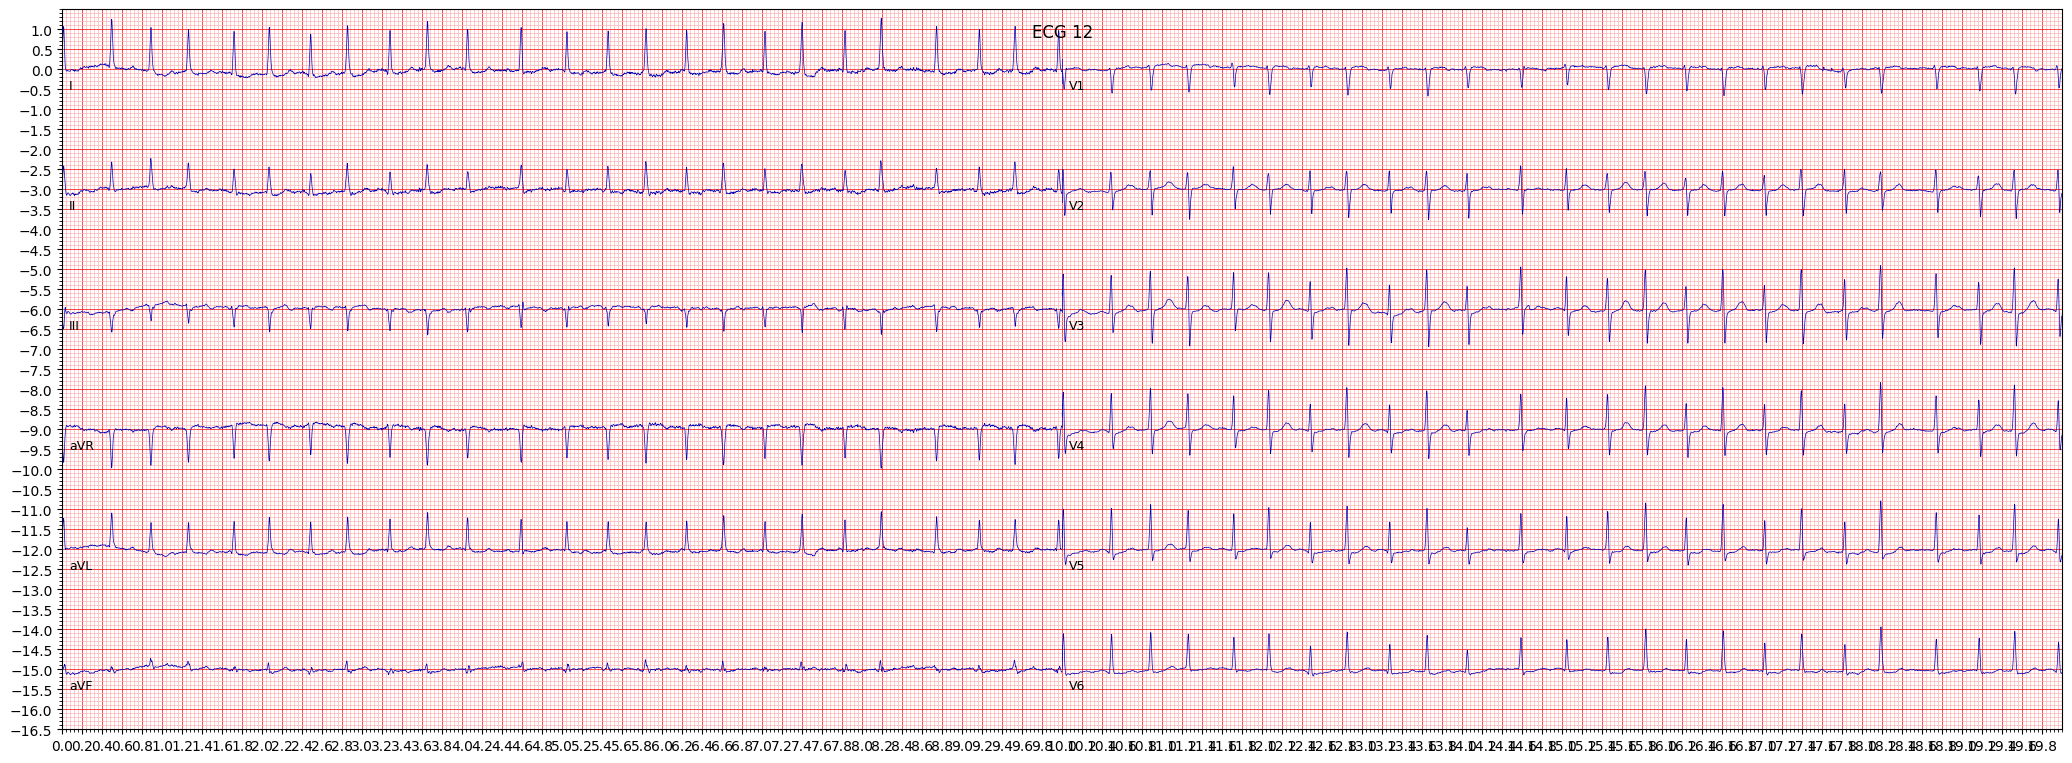

In [4]:
header_files, recording_files = find_challenge_files(data_directory)
num_recordings = len(header_files)
print(f"Finished loading: {num_recordings} files")

header_files, recording_files = find_challenge_files(data_directory)
num_recordings = len(header_files)
    
print(f"Finished loading: {num_recordings} files")
recording_index = 469

header = load_header(header_files[recording_index])
current_labels= clean_labels(header)
print(current_labels)
current_abbreviations=[labels_to_class[int(label)] for label in current_labels]
print(current_abbreviations)

recording_good = np.array(load_recording(recording_files[recording_index]), dtype=np.float32)
recording_full = get_leads_values(header, recording_good, leads)

ecg_plot.plot(recording_good / 1000, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()




# Healthy heart visualisation


Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).


Finished loading: 1000 files
['426783006']
['sinus rhythm']


Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 40.0]), which exceeds Locator.MAXTICK

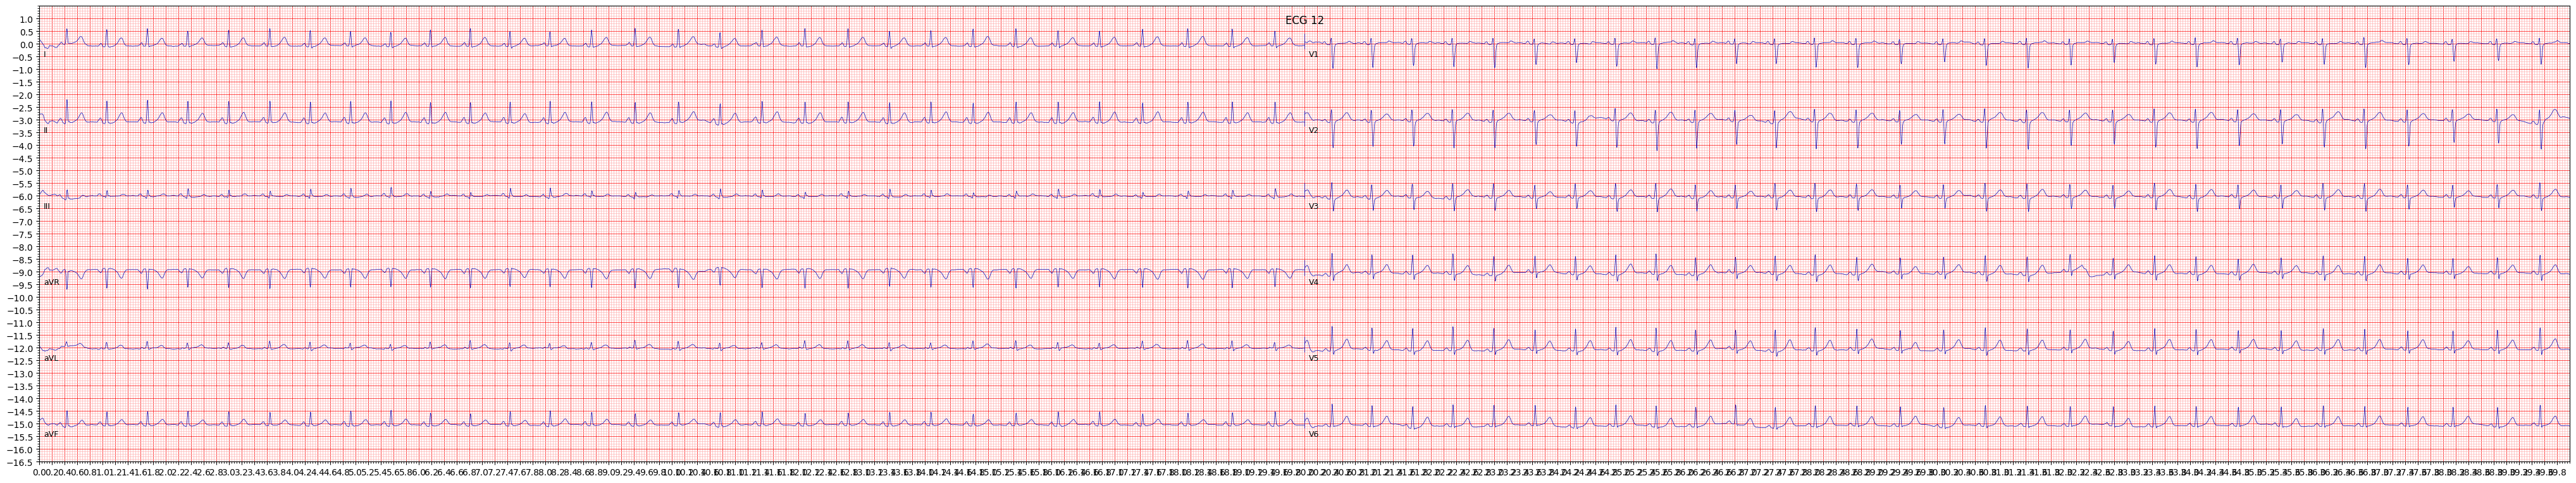

In [39]:

header_files, recording_files = find_challenge_files(data_directory)
num_recordings = len(header_files)
    
print(f"Finished loading: {num_recordings} files")
recording_index = 2#15 is rbbb , 2 is sinus

header = load_header(header_files[recording_index])
current_labels= clean_labels(header)
print(current_labels)
current_abbreviations=[labels_to_class[int(label)] for label in current_labels]
print(current_abbreviations)

recording_good = np.array(load_recording(recording_files[recording_index]), dtype=np.float32)
recording_full = get_leads_values(header, recording_good, leads)

ecg_plot.plot(recording_good / 1000, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()


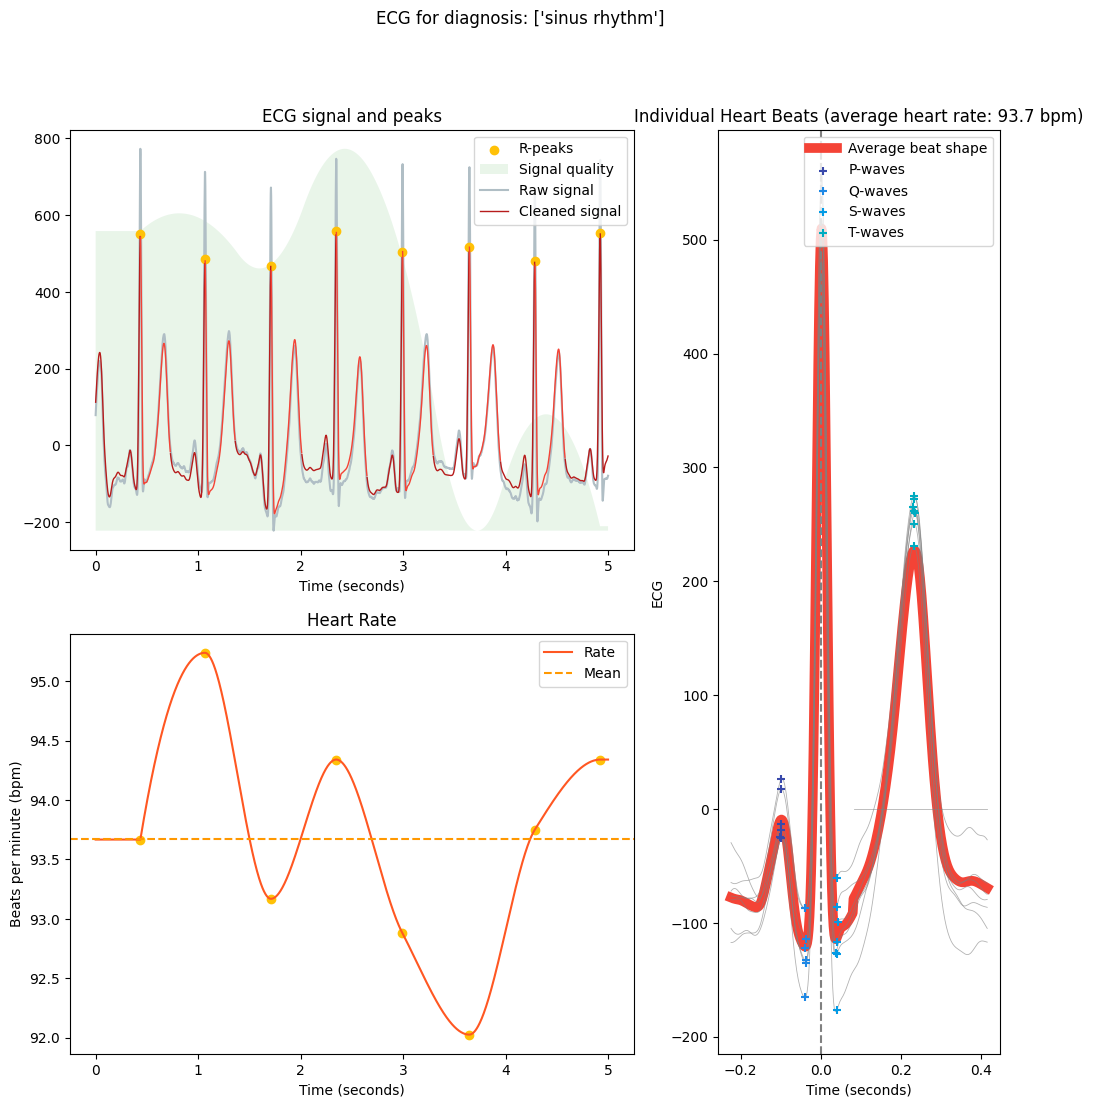

In [42]:
signals_good, info_good = nk.ecg_process(recording_good[11][:2500], sampling_rate=500)

# Visualise the processing
nk.ecg_plot(signals_good, info_good)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")

bpm=np.mean(nk.ecg_rate(signals_good, sampling_rate=500))


Text(0.5, 0.98, "ECG Lead V1 for diagnosis: ['right bundle branch block']")

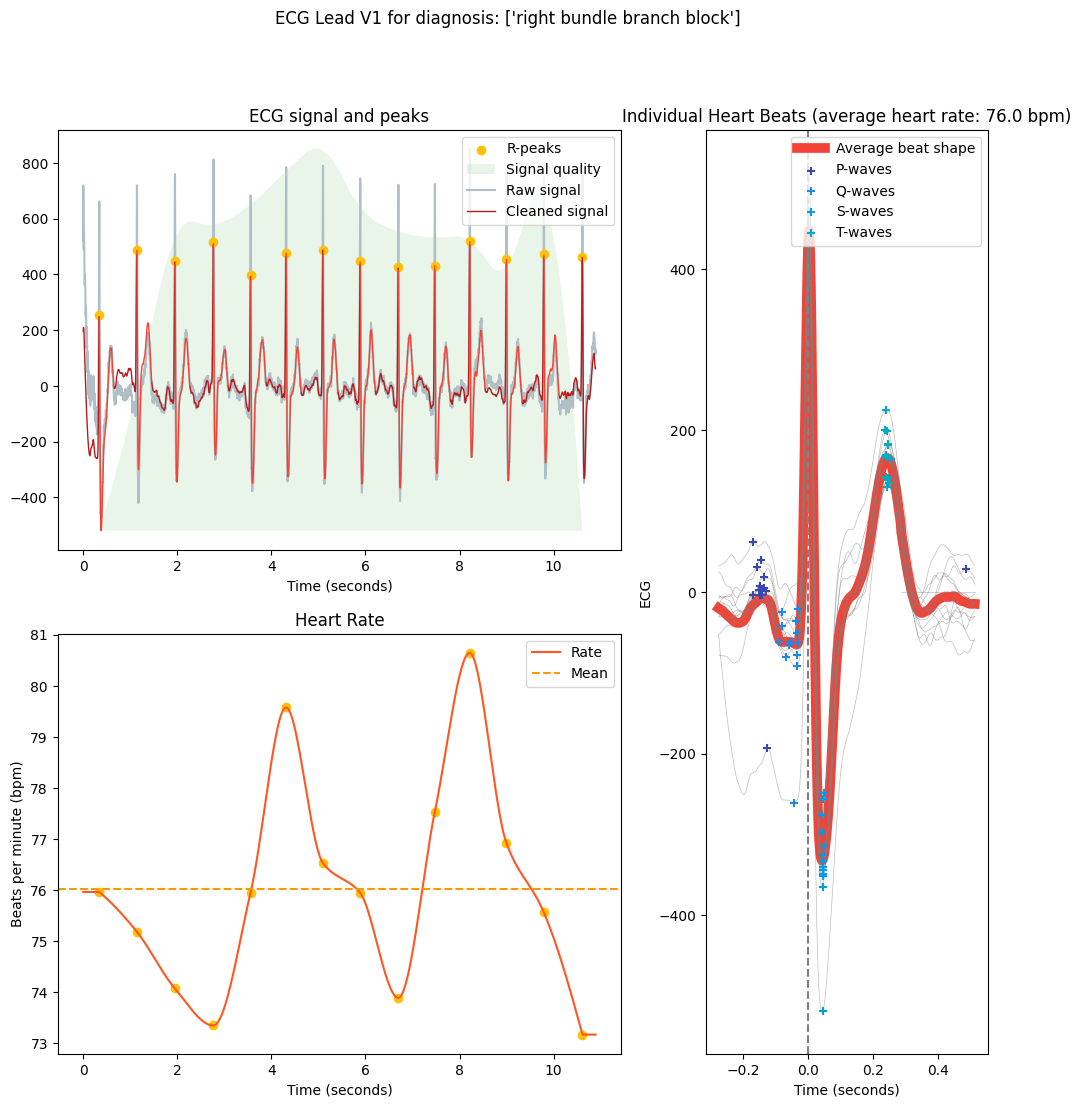

In [7]:
signals_V6, info_V6 = nk.ecg_process(recording_good[11], sampling_rate=500)
# Visualise the processing

#This plot is good but R peaks are totally wrong (they should be at the lowest peak).
nk.ecg_plot(signals_V6, info_V6)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG Lead V1 for diagnosis: {current_abbreviations}")


Is inverted: False


Text(0.5, 0.98, "ECG Lead V1 for diagnosis: ['right bundle branch block']")

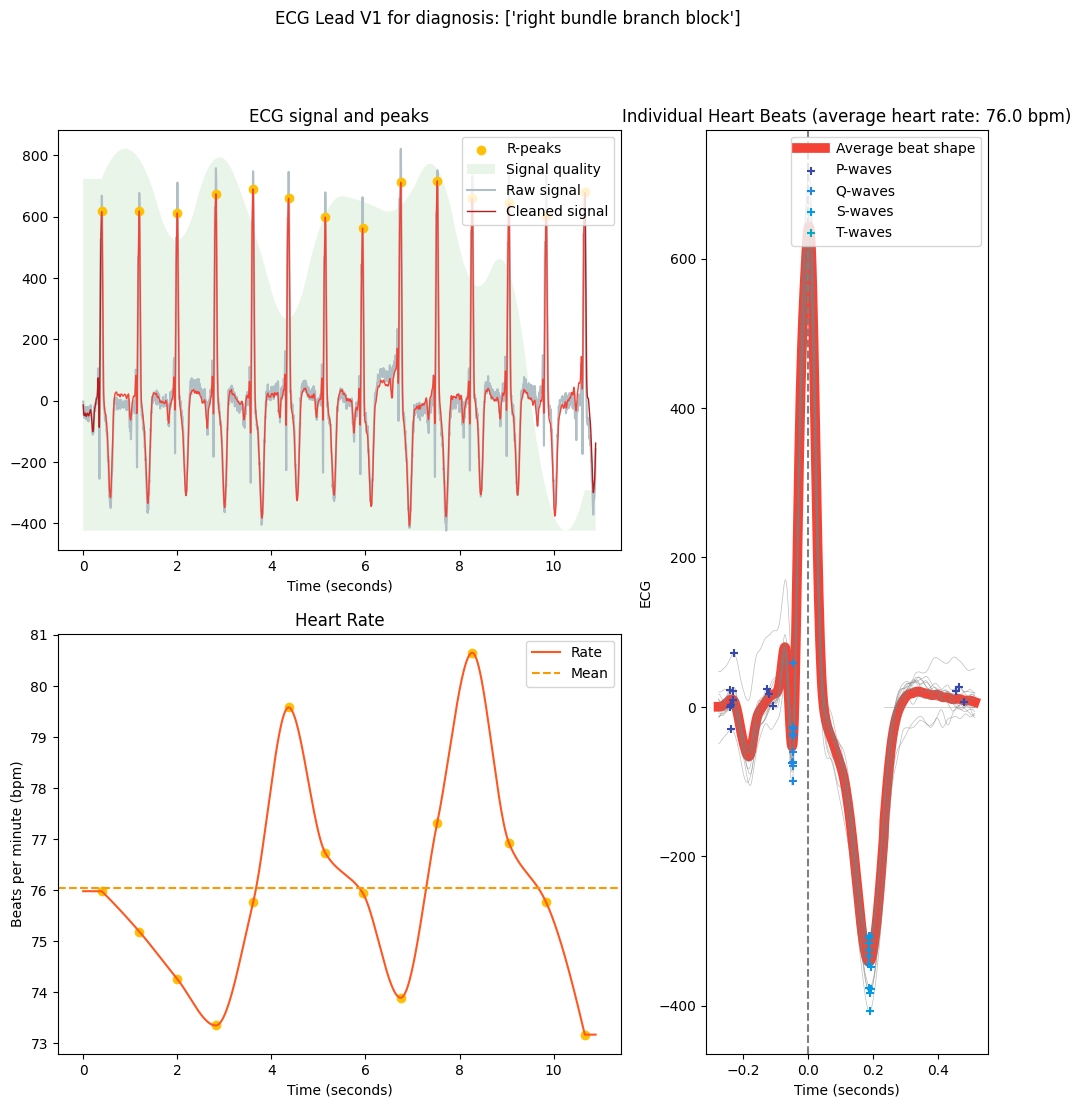

In [8]:
ecg, inverted = nk.ecg_invert(recording_good[6], sampling_rate=500)
print(f"Is inverted: {inverted}")
signals_V6, info_V6 = nk.ecg_process(ecg, sampling_rate=500)

# Visualise the processing

#This plot is good but R peaks are totally wrong (they should be at the lowest peak).
nk.ecg_plot(signals_V6, info_V6)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG Lead V1 for diagnosis: {current_abbreviations}")


# Leading rythm assessment
- Bradycardia -> BPM below 50
- Normocardia -> BPM between 50 and 100
- Tachycardia -> BPM abowe 100

In [9]:
def leading_rythm(bpm):
    if(bpm < 50):
       return -1
    elif (50< bpm < 100):
        return 0
    else:
        return 1

leading_rythm(bpm)

0

# Rhythm origins and heart electrical axis assesment

In [10]:
def get_wavelet_orientation(onset, peak, offset):
    if peak > (onset+offset)/2 :
        return 1
    else:
        return -1

#R->L (correct) return 1, L->R (incorrect) return -1 LEAD I
def get_right_left_activation_leadI(p_complexes):
    return np.mean([get_wavelet_orientation(*px) for px in p_complexes])

#Correct sinus return 1 (pwave positive), Extra sinus orign return -1 (pwave negative) on lead II or lead III or aVF
def get_vertical_orientation(p_complexes):
    return np.mean([get_wavelet_orientation(*px) for px in p_complexes])

def get_p_complex(signals, info):
    num_peaks = len(info['ECG_P_Peaks'])
    result=[]
    for i in range(num_peaks):
        p_on = info['ECG_P_Onsets'][i]
        p = info['ECG_P_Peaks'][i]
        p_off = info['ECG_P_Offsets'][i]

        if np.isnan([p_on, p, p_off]).any():
            continue

        p_complex = [signals.iloc[p_on]['ECG_Raw'], signals.iloc[p]['ECG_Raw'], signals.iloc[p_off]['ECG_Raw']]
        
        if np.isnan(p_complex).any():
            continue
        else:
            result.append(p_complex)
    return result
    
#          | R   |  L
#---------------------
# top-down | 1 1 | 1 -1
#---------------------
# down-top | -1 1 | -1 -1
def get_rhythm_origin(signalsI, infoI, signalsII, infoII):
    I_pcomplexes = get_p_complex(signalsI, infoI)
    II_pcomplexes = get_p_complex(signalsII, infoII)

    return get_vertical_orientation(II_pcomplexes), get_right_left_activation_leadI(I_pcomplexes)
    



#https://www.cmj.hr/1999/40/1/9933900.htm
def get_heart_axis(leadI_QRS, leadaVF_QRS):
    results=[]
    lenI = len(leadI_QRS)
    lenaVF = len(leadaVF_QRS)
    target_len = 0
    if lenI >= lenaVF:
        target_len = lenaVF
    else:
        target_len = lenI
        
    for i in range(target_len):
        aVF_QRS=leadaVF_QRS[i]
        I_QRS=leadI_QRS[i]
        altitudeAVF=sum(aVF_QRS)
        altitudeI=sum(I_QRS)
        results.append(math.degrees(math.atan2((2*altitudeAVF),(math.sqrt(3)*altitudeI))))
    return results

def get_QRS_from_lead(signals, info):
    num_peaks = len(info['ECG_R_Peaks'])
    result = []
    for i in range(num_peaks):
        Q = info['ECG_Q_Peaks'][i]
        R = info['ECG_R_Peaks'][i]
        S = info['ECG_S_Peaks'][i]

        QRS_ts= [Q, R, S]
        if np.isnan(QRS_ts).any():
            continue

        QRS = [signals.iloc[Q]['ECG_Raw'], signals.iloc[R]['ECG_Raw'], signals.iloc[S]['ECG_Raw']]
        if np.isnan(QRS).any():
            continue
        else:
            result.append(QRS)
    
    return result
        


In [11]:
signals_I, info_I = nk.ecg_process(recording_good[0], sampling_rate=500)
signals_II, info_II = nk.ecg_process(recording_good[1], sampling_rate=500)
signals_aVF, info_aVF = nk.ecg_process(recording_good[5], sampling_rate=500)

QRS_I = get_QRS_from_lead(signals_I, info_I)
QRS_aVF = get_QRS_from_lead(signals_aVF, info_aVF)



print(QRS_I)
print(QRS_aVF)
print(get_heart_axis(QRS_I, QRS_aVF))
print(get_rhythm_origin(signals_I, info_I, signals_II, info_II))

[[-2.0, 283.0, -236.0], [-34.0, 245.0, -226.0], [-54.0, 276.0, -261.0], [-24.0, 242.0, -240.0], [-75.0, 215.0, -272.0], [-81.0, 209.0, -234.0], [-62.0, 246.0, -254.0], [-80.0, 232.0, -249.0], [-12.0, 253.0, -242.0], [-85.0, 238.0, -239.0], [-40.0, 276.0, -293.0], [-28.0, 237.0, -246.0], [-22.0, 268.0, -272.0]]
[[-65.0, 405.0, 23.0], [-114.0, 279.0, -124.0], [-50.0, 405.0, -46.0], [-106.0, 306.0, -45.0], [-63.0, 334.0, -47.0], [-98.0, 320.0, -101.0], [-119.0, 372.0, -63.0], [-87.0, 345.0, -81.0], [-93.0, 353.0, -95.0], [-24.0, 324.0, -70.0], [-113.0, 348.0, -72.0], [-91.0, 343.0, -51.0], [-110.0, 324.0, -143.0]]
[83.8722803159501, 107.58020961841542, 96.2379044376028, 97.00762973687216, 117.03687529729557, 127.18638629837925, 107.69590657707684, 115.3890857167028, 90.30072209061684, 107.94289673314533, 106.84858172565953, 99.05773848149892, 107.59569880192697]
(1.0, 1.0)


# Check for missing QRS complexes and retrieve qrs statistics
- QRS Duration
- Missing QRS
- Missing P
- S duration


In [12]:
#Check if there are missing QRS complexes, if so we diagnose atrioventricular block
def has_missing_qrs(signals, info):
    R_peaks = info['ECG_R_Peaks']
    distances = [R_peaks[i] - R_peaks[i-1] for i in range(1, len(R_peaks))]
    quantile90=np.quantile(distances,0.9)
    quantile10=np.quantile(distances,0.1)
    mean_without_outliers = np.mean([d for d in distances if (d>quantile10 and d<quantile90)])
    is_missing_qrs = distances > (mean_without_outliers * 1.5)
    return any(is_missing_qrs)


def has_missing_p(signals, info):
    num_of_p = np.count_nonzero(~np.isnan(info['ECG_P_Peaks']))
    num_of_beats = len(info['ECG_R_Peaks'])
    return num_of_p < (num_of_beats - 1)
    

def get_QRS_duration(signals, info, freq=500):
    num_peaks = min([len(info['ECG_R_Peaks']), len(info['ECG_Q_Peaks']), len(info['ECG_S_Peaks'])])
    result = []
    for i in range(num_peaks):
        Q = info['ECG_Q_Peaks'][i]
        R = info['ECG_R_Peaks'][i]
        S = info['ECG_S_Peaks'][i]
        if any(np.isnan([Q,R,S])):
            continue
        else:
            result.append((S-Q)/freq)

    return result

def get_S_duration(signals, info, freq=500):
    num_peaks = len(info['ECG_R_Peaks'])
    result = []
    for i in range(num_peaks):
        s = info['ECG_S_Peaks'][i]
        r = info['ECG_R_Peaks'][i]
        if any(np.isnan([r,s])):
            continue
        else:
            result.append((s-r)/freq)
    return result


def get_R_duration(signals, info, freq=500):
    num_peaks = len(info['ECG_R_Peaks'])
    result = []
    for i in range(num_peaks):
        R = info['ECG_R_Peaks'][i]
        R_on = info['ECG_R_Onsets'][i]
        R_off = info['ECG_R_Offsets'][i]
        S = info['ECG_S_Peaks'][i]
        if any(np.isnan([R,R_on, R_off, S])):
            continue
        else:
            if S < R_off:
                result.append((S - R_on)/freq)
            else:
                result.append((R_off - R_on)/freq)

    return result

    


has_missing_qrs(signals_I, info_I)
has_missing_p(signals_I, info_I)
get_QRS_duration(signals_I, info_I)
get_S_duration(signals_I, info_I)

[0.052,
 0.052,
 0.048,
 0.054,
 0.056,
 0.058,
 0.052,
 0.046,
 0.044,
 0.054,
 0.052,
 0.048,
 0.046]

# RBBB signal analysis
- S longer than 40ms or longer in duration than R in leads I or V6
- RsR', rSR' rsR' complex in V1 or V2
- QRS > 120ms
- negative return delayed of more than 50ms in V1
- ST-T leaning oposite to main QRS
  

Finished loading: 1000 files
A2000 12 500 8604
A2000.mat 16x1+24 1000.0(0)/mV 16 0 23 -2 0 I
A2000.mat 16x1+24 1000.0(0)/mV 16 0 28 -14 0 II
A2000.mat 16x1+24 1000.0(0)/mV 16 0 6 -33 0 III
A2000.mat 16x1+24 1000.0(0)/mV 16 0 -25 -22 0 aVR
A2000.mat 16x1+24 1000.0(0)/mV 16 0 9 6 0 aVL
A2000.mat 16x1+24 1000.0(0)/mV 16 0 18 -36 0 aVF
A2000.mat 16x1+24 1000.0(0)/mV 16 0 15 -18 0 V1
A2000.mat 16x1+24 1000.0(0)/mV 16 0 27 5 0 V2
A2000.mat 16x1+24 1000.0(0)/mV 16 0 23 10 0 V3
A2000.mat 16x1+24 1000.0(0)/mV 16 0 17 -15 0 V4
A2000.mat 16x1+24 1000.0(0)/mV 16 0 11 -24 0 V5
A2000.mat 16x1+24 1000.0(0)/mV 16 0 23 -43 0 V6
# Age: 61
# Sex: Female
# Dx: 59118001
# Rx: Unknown
# Hx: Unknown
# Sx: Unknown

['59118001']
['right bundle branch block']


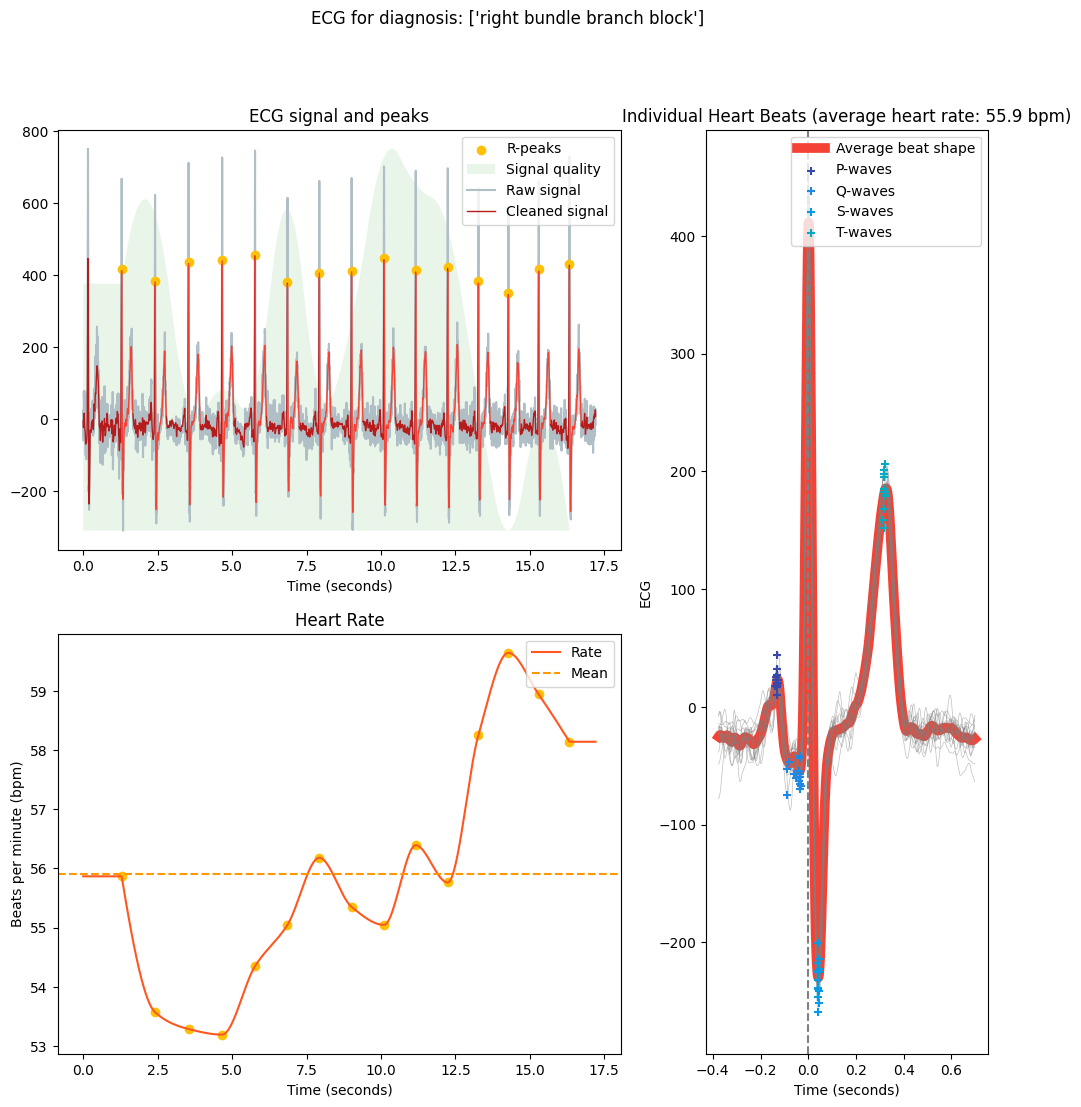

False
False
[0.078, 0.104, 0.076, 0.128, 0.08, 0.12, 0.078, 0.072, 0.074, 0.08, 0.094, 0.086, 0.128, 0.078]


In [13]:
#RBBB
data_directory="../data/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018/g3"

header_files, recording_files = find_challenge_files(data_directory)
num_recordings = len(header_files)
index_RBBB = header_files.index('../data/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018/g3/A2000.hea')
    
print(f"Finished loading: {num_recordings} files")

header = load_header(header_files[index_RBBB])
print(header)
current_labels= clean_labels(header)
print(current_labels)
current_abbreviations=[labels_to_class[int(label)] for label in current_labels]
print(current_abbreviations)

recording = np.array(load_recording(recording_files[index_RBBB]), dtype=np.float32)
recording_full = get_leads_values(header, recording, leads)

signals_I, info_I = nk.ecg_process(recording[0], sampling_rate=500)

# Visualise the processing
plt.close()
nk.ecg_plot(signals_I, info_I)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")
plt.show()

bpm=np.mean(nk.ecg_rate(signals_I, sampling_rate=500))

print(has_missing_qrs(signals_I, info_I))
print(has_missing_p(signals_I, info_I))
print(get_QRS_duration(signals_I, info_I))


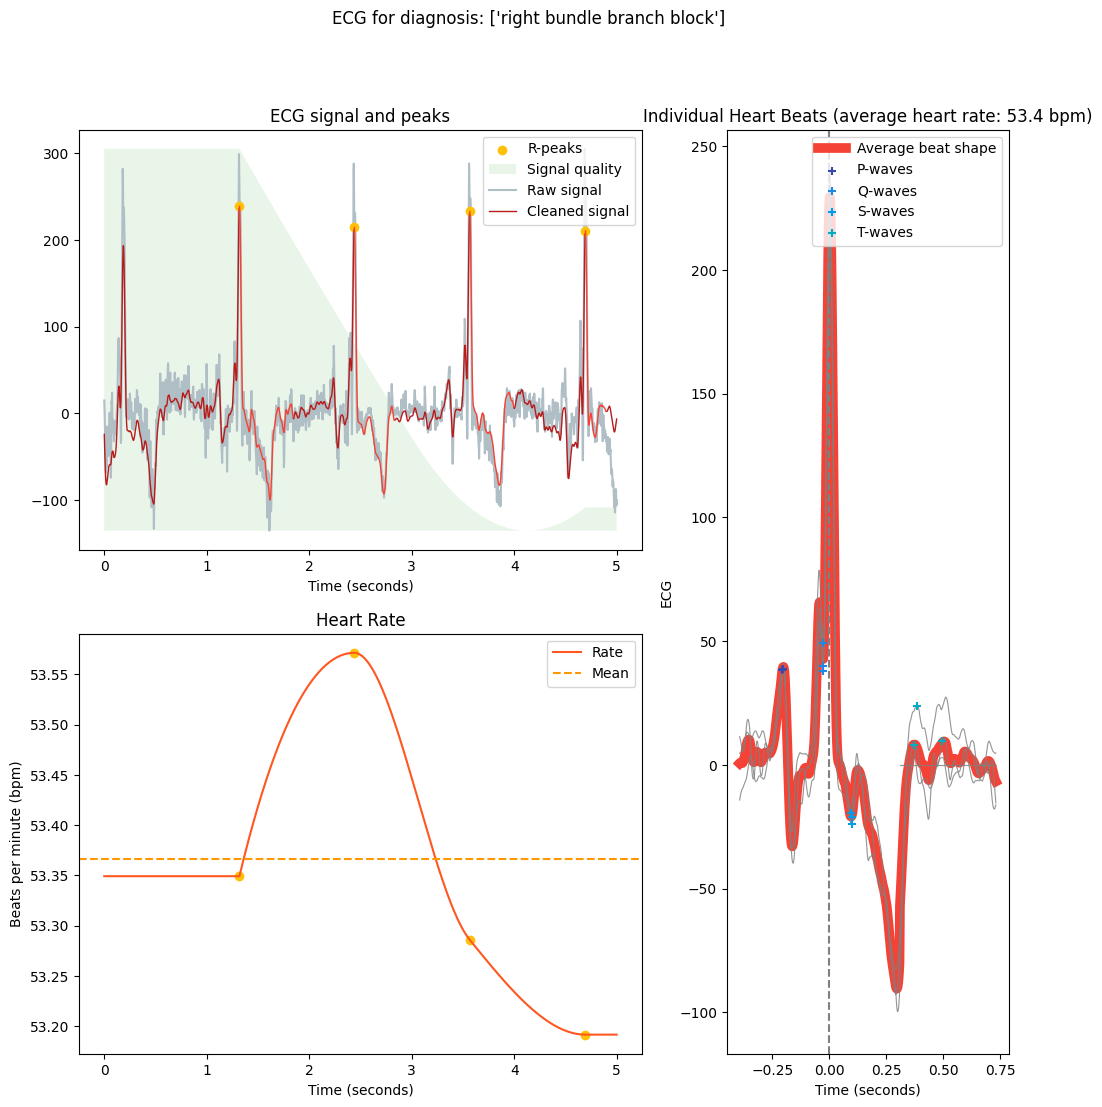

False
False
[0.126, 0.124, 0.12]
[0.096, 0.096, 0.092]


In [14]:
signals_V1, info_V1 = nk.ecg_process(recording[6][:2500], sampling_rate=500)

# Visualise the processing
plt.close()
nk.ecg_plot(signals_V1, info_V1)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")
plt.show()

bpm=np.mean(nk.ecg_rate(signals_V1, sampling_rate=500))

print(has_missing_qrs(signals_V1, info_V1))
print(has_missing_p(signals_V1, info_V1))
print(get_QRS_duration(signals_V1, info_V1))
print(get_S_duration(signals_V1, info_V1))

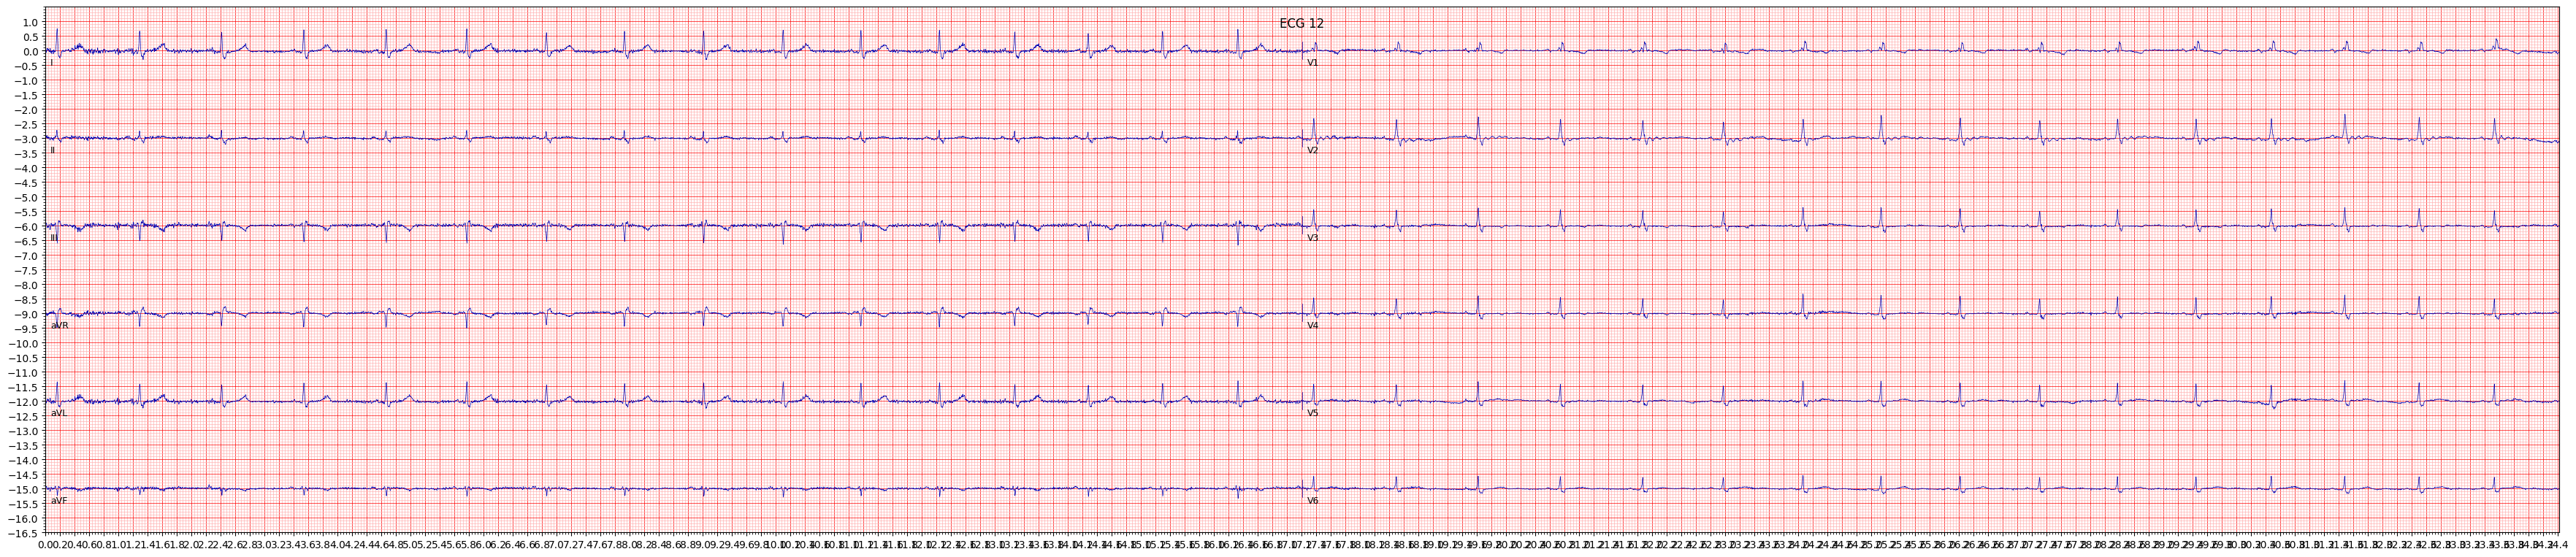

In [17]:
ecg_plot.plot(recording/1000, sample_rate=500)

Is inverted: False


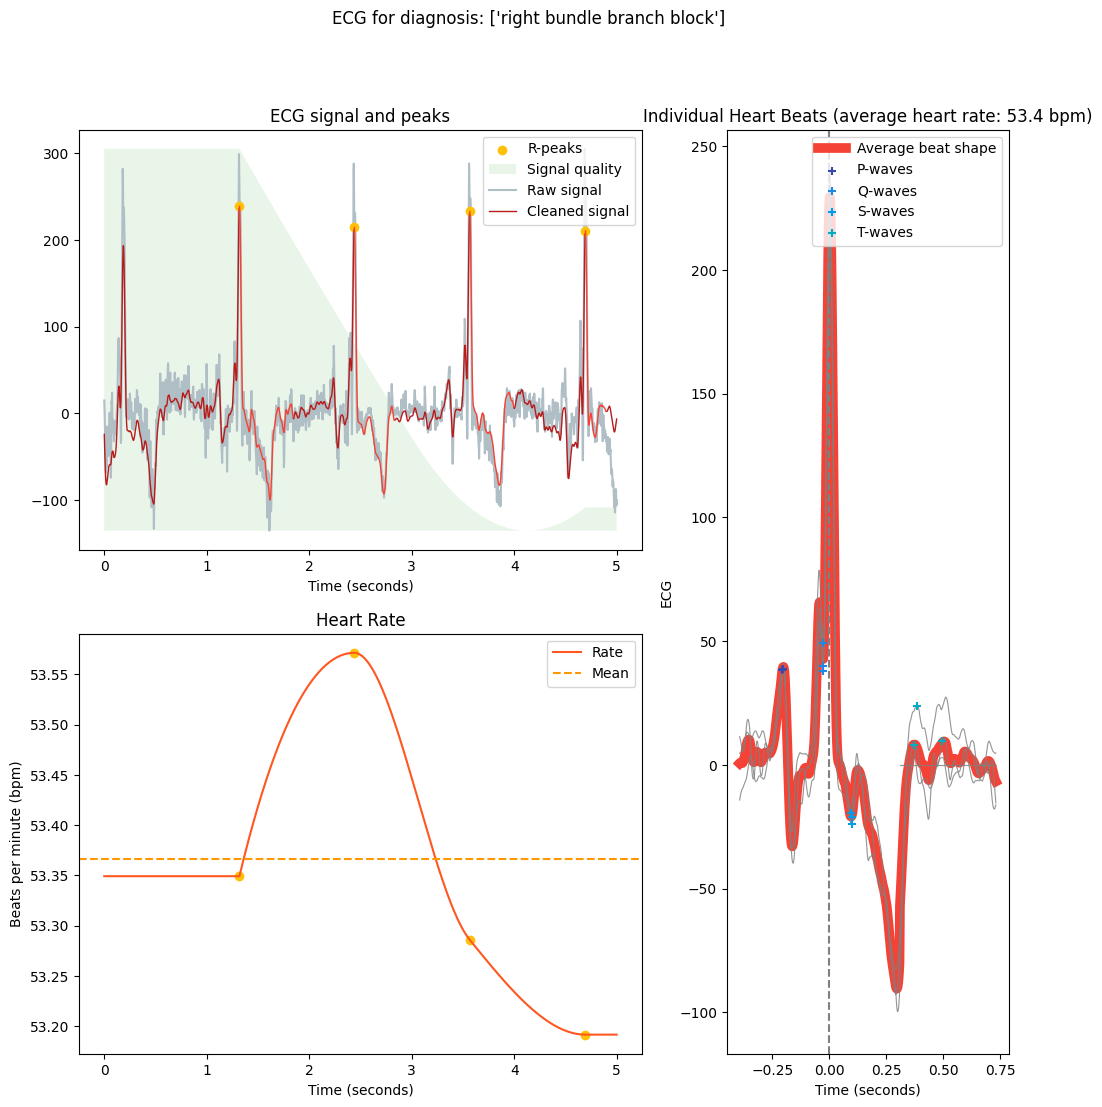

In [18]:
ecg, inverted = nk.ecg_invert(recording[6][:2500], sampling_rate=500)
print(f"Is inverted: {inverted}")

signals_V1, info_V1 = nk.ecg_process(ecg, sampling_rate=500)

# Visualise the processing
plt.close()
nk.ecg_plot(signals_V1, info_V1)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")
plt.show()

{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([ 659, 1219, 1782, 2346]), 'ECG_R_Peaks_Uncorrected': array([ 659, 1219, 1782, 2346]), 'ECG_fixpeaks_ectopic': [], 'ECG_fixpeaks_missed': [], 'ECG_fixpeaks_extra': [], 'ECG_fixpeaks_longshort': [], 'ECG_fixpeaks_method': 'kubios', 'ECG_fixpeaks_rr': array([1.12466667, 1.12      , 1.126     , 1.128     ]), 'ECG_fixpeaks_drrs': array([ 0.13262599, -0.55702918,  0.71618037,  0.23872679]), 'ECG_fixpeaks_mrrs': array([-0.14652015, -1.17216117,  0.07326007,  0.29304029]), 'ECG_fixpeaks_s12': array([-0.55702918,  0.13262599,  0.23872679,  0.71618037]), 'ECG_fixpeaks_s22': array([-0.55702918,  0.71618037,  0.23872679, -0.55702918]), 'ECG_fixpeaks_c1': 0.13, 'ECG_fixpeaks_c2': 0.17, 'sampling_rate': 500, 'ECG_P_Peaks': [555, 1116, 1678, 2242], 'ECG_P_Onsets': [533, 1094, 1640, 2224], 'ECG_P_Offsets': [574, 1136, 1698, 2263], 'ECG_Q_Peaks': [644, 1205, 1768, nan], 'ECG_R_Onsets': [638, 1200, 1760, nan], 'ECG_R_Offsets':

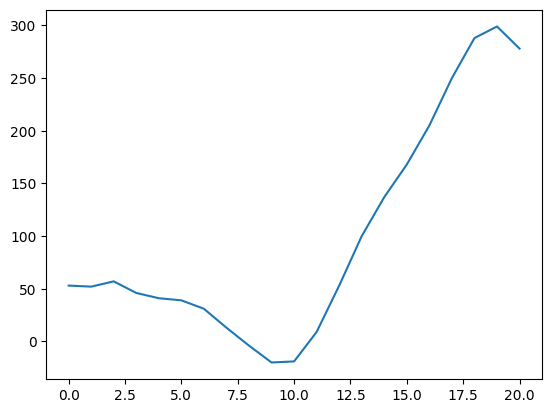

In [19]:
print(info_V1)

y = signals_V1['ECG_Raw'].iloc[638:659].values
x = range(len(y))
print(y)

print(np.diff(((y > 0).astype(int))))
plt.plot(x,y)

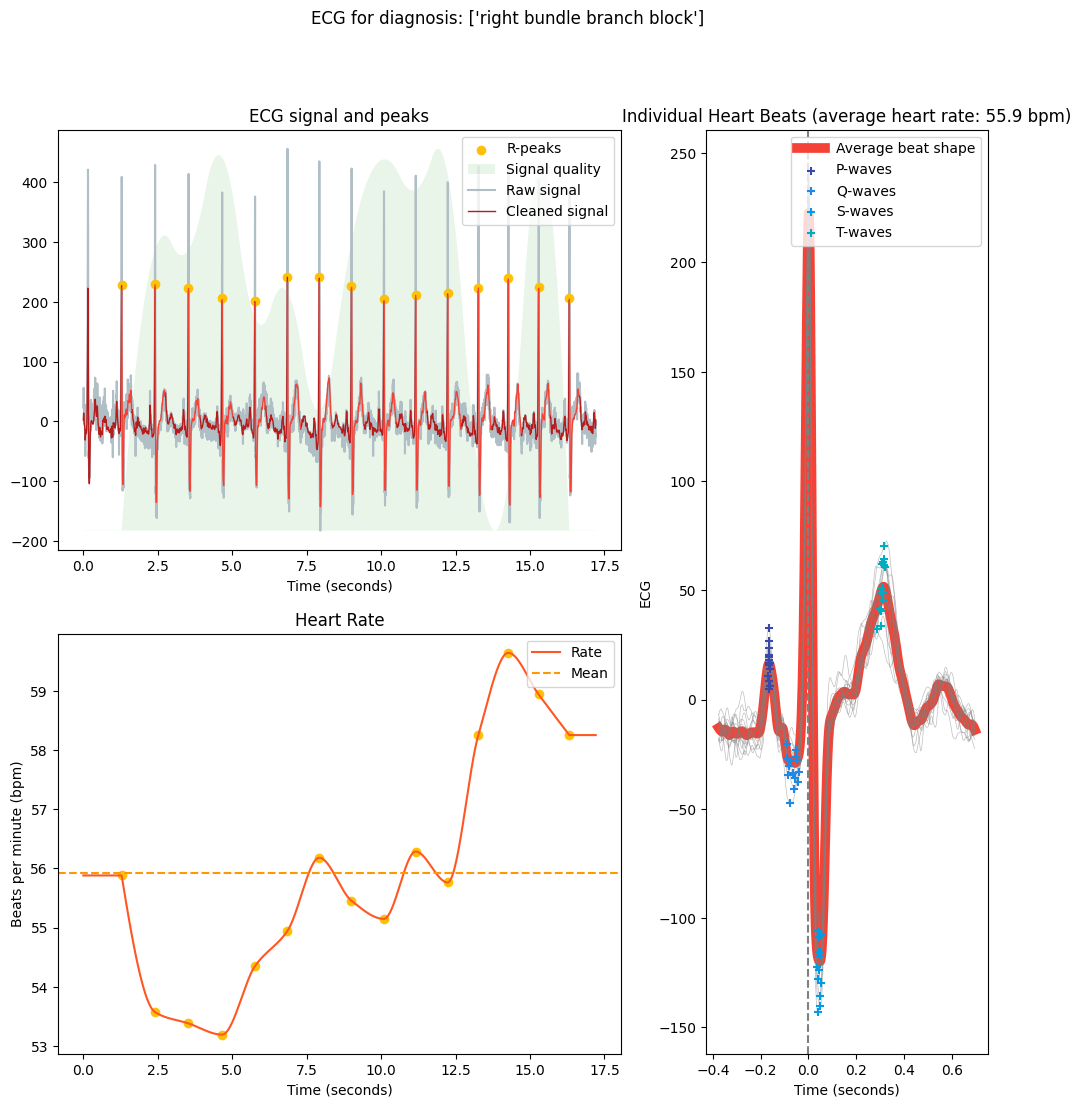

False
False
[0.13, 0.136, 0.102, 0.112, 0.1, 0.138, 0.118, 0.09, 0.1, 0.116, 0.108, 0.088, 0.09, 0.124]
[0.04, 0.046, 0.048, 0.052, 0.052, 0.05, 0.038, 0.034, 0.048, 0.042, 0.044, 0.042, 0.048, 0.04]


In [20]:
signals_V6, info_V6 = nk.ecg_process(recording[11], sampling_rate=500)

# Visualise the processing
plt.close()
nk.ecg_plot(signals_V6, info_V6)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")
plt.show()

bpm=np.mean(nk.ecg_rate(signals_V6, sampling_rate=500))

print(has_missing_qrs(signals_V6, info_V6))
print(has_missing_p(signals_V6, info_V6))
print(get_QRS_duration(signals_V6, info_V6))
print(get_S_duration(signals_V6, info_V6))


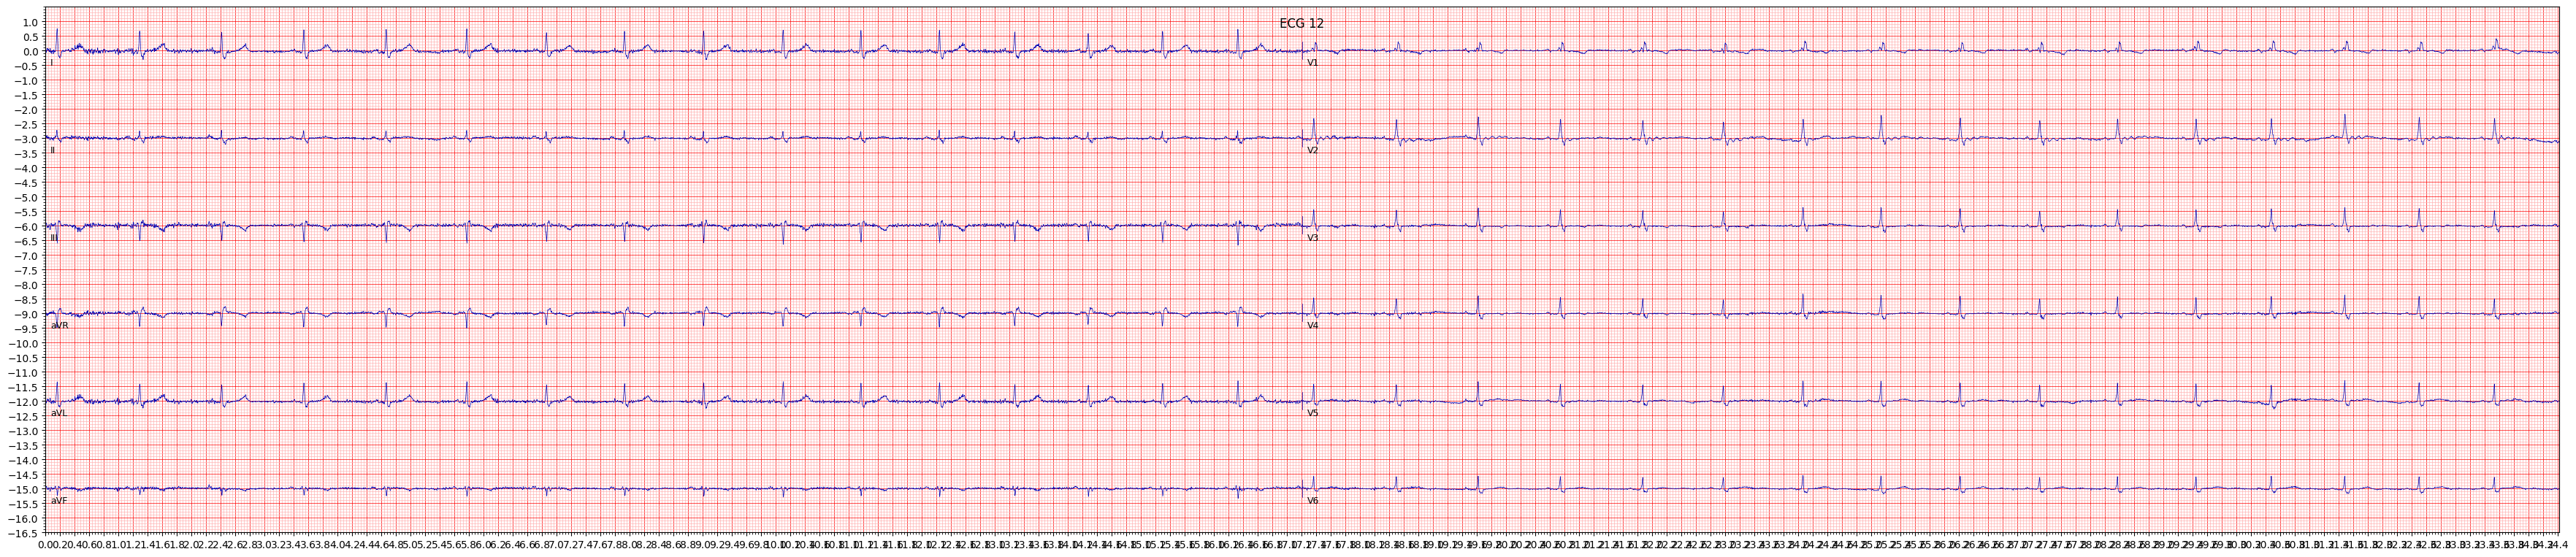

In [21]:
ecg_plot.plot(recording / 1000, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()

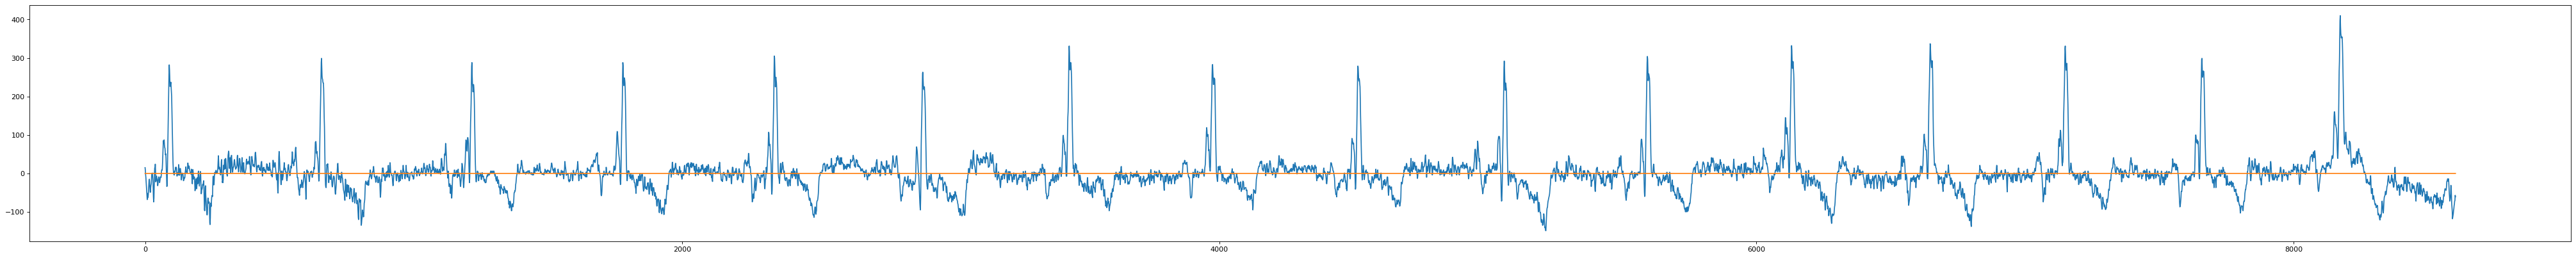

In [22]:
x = range(len(recording[6]))
plt.figure(figsize=(64, 6), dpi=80)
plt.plot(x, recording[6])
plt.plot(x, np.zeros(len(x)))



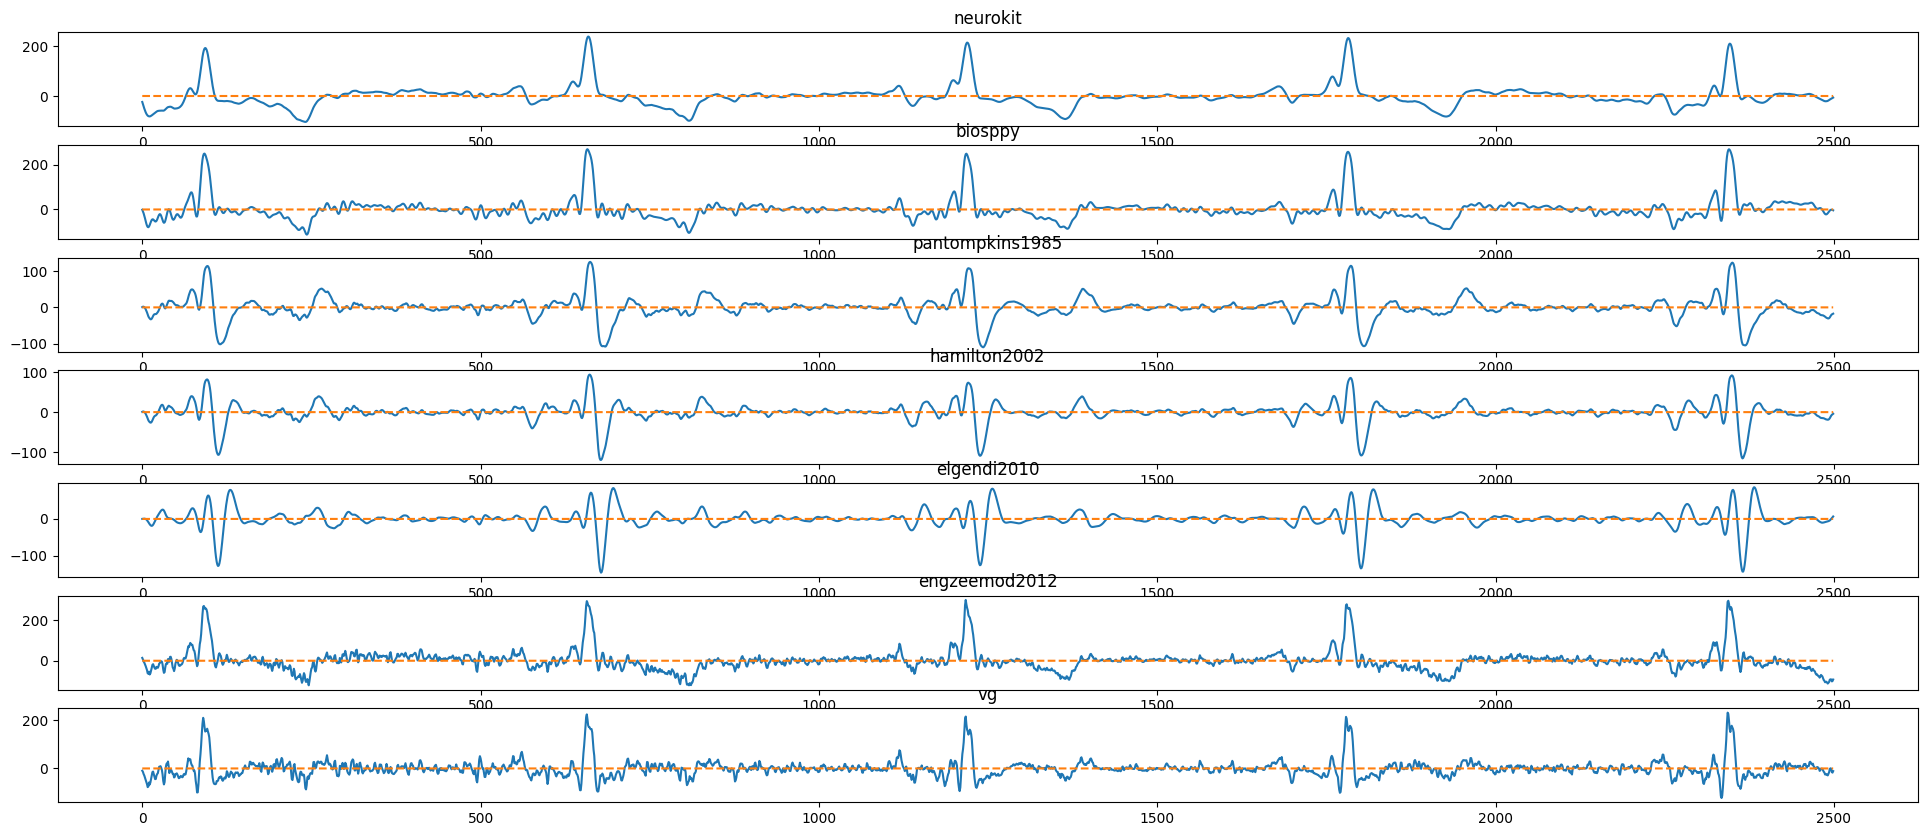

In [23]:
V1_RBBB_raw = recording[6][:2500]
x = range(len(V1_RBBB_raw))
smoothwindow=0.1
avgwindow=0.75
gradthreshweight=1.5
minlenweight=0.4
mindelay=0.3
sampling_rate=500

figure, axis = plt.subplots(7, 1)
figure.set_size_inches(24,10)

methods = ['neurokit', 'biosppy','pantompkins1985', 'hamilton2002', 'elgendi2010', 'engzeemod2012', 'vg']
for i in range(len(methods)):
    m = methods[i]
    ecg_clean = nk.ecg_clean(V1_RBBB_raw, sampling_rate=sampling_rate, method=m)
    axis[i].plot(x, ecg_clean)
    axis[i].plot(x, np.zeros(len(x)), linestyle='dashed')
    axis[i].set_title(m)
    

[51, 66, 71, 67, 67]


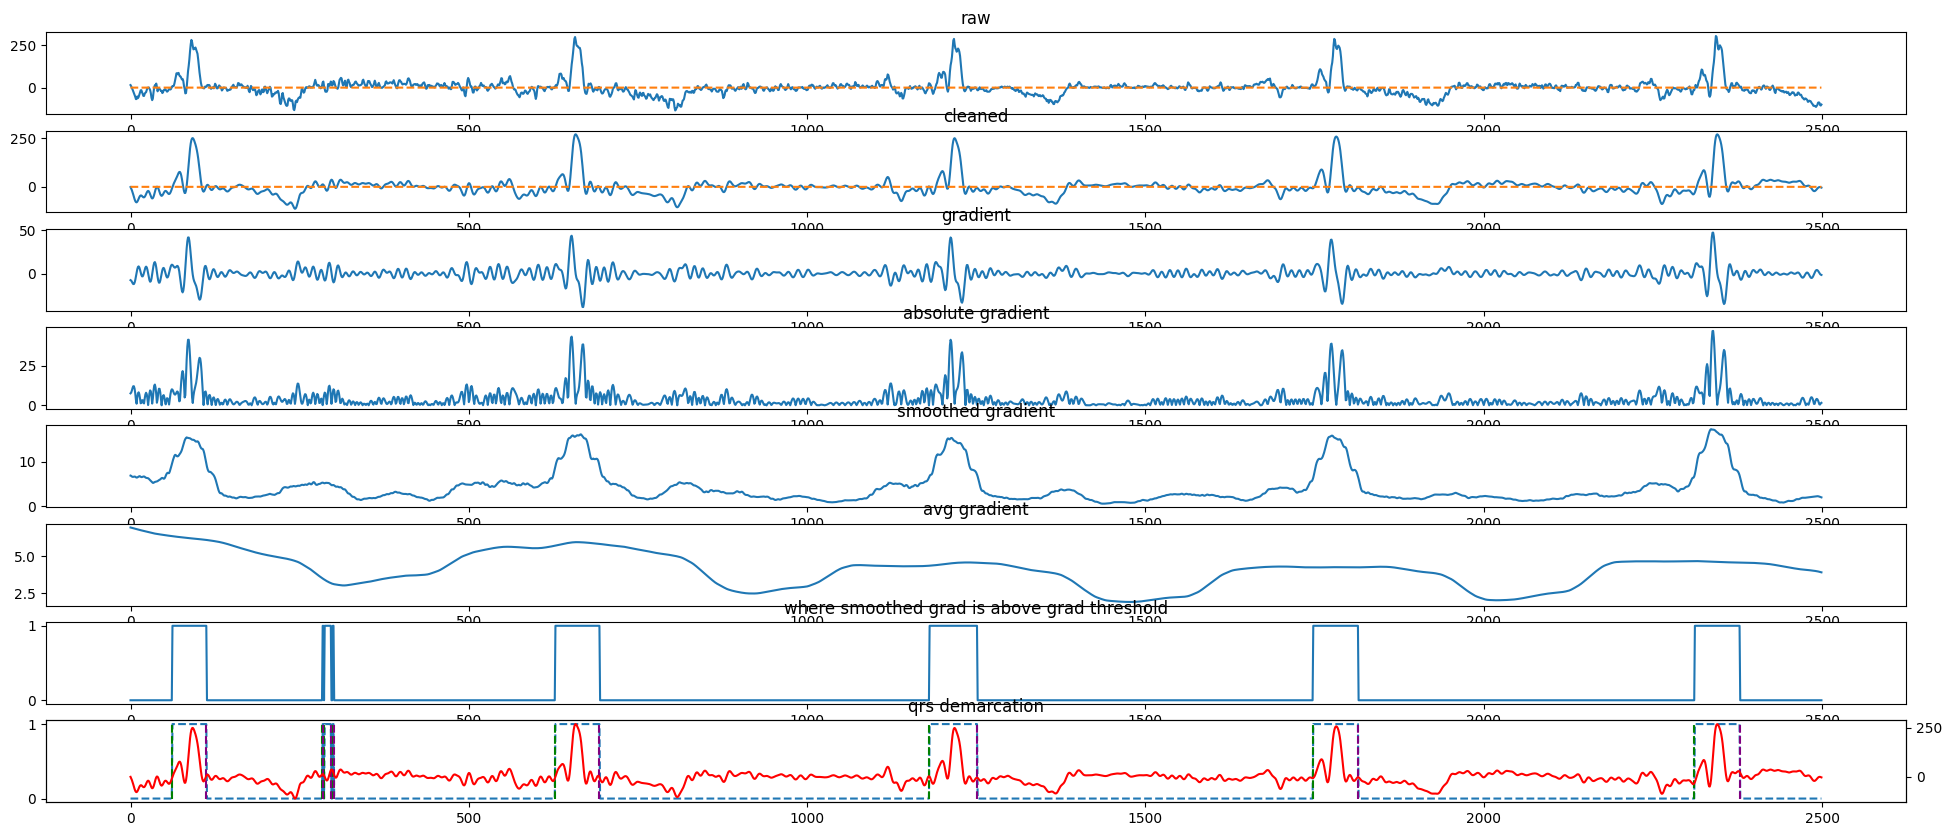

In [24]:
V1_RBBB_raw = recording[6][:2500]
x = range(len(V1_RBBB_raw))
smoothwindow=0.1
avgwindow=0.75
gradthreshweight=1.5
minlenweight=0.4
mindelay=0.3
sampling_rate=500

ecg_clean = nk.ecg_clean(V1_RBBB_raw, sampling_rate=sampling_rate, method='biosppy')

signal_gradient = np.gradient(ecg_clean)

absgrad = np.abs(signal_gradient)
smooth_kernel = int(np.rint(smoothwindow * sampling_rate))
avg_kernel = int(np.rint(avgwindow * sampling_rate))

smoothgrad = nk.signal.signal_smooth(absgrad, kernel="boxcar", size=smooth_kernel)
avggrad = nk.signal.signal_smooth(smoothgrad, kernel="boxcar", size=avg_kernel)
gradthreshold = gradthreshweight * avggrad

mindelay = int(np.rint(sampling_rate * mindelay))
qrs = smoothgrad > gradthreshold
beg_qrs = np.where(np.logical_and(np.logical_not(qrs[0:-1]), qrs[1:]))[0]
end_qrs = np.where(np.logical_and(qrs[0:-1], np.logical_not(qrs[1:])))[0]
qrs_durations_tmp = end_qrs - beg_qrs
qrs_durations = [x for x in qrs_durations_tmp if x > 30]


figure, axis = plt.subplots(8, 1)

figure.set_size_inches(24,10)
axis[0].plot(x, V1_RBBB_raw)
axis[0].plot(x, np.zeros(len(x)), linestyle='dashed')
axis[0].set_title("raw")

axis[1].plot(x, ecg_clean)
axis[1].plot(x, np.zeros(len(x)), linestyle='dashed')
axis[1].set_title("cleaned")

axis[2].plot(range(len(signal_gradient)), signal_gradient)
axis[2].set_title("gradient")


axis[3].plot(range(len(absgrad)), absgrad)
axis[3].set_title("absolute gradient")

axis[4].plot(range(len(smoothgrad)), smoothgrad)
axis[4].set_title("smoothed gradient")

axis[5].plot(range(len(avggrad)), avggrad)
axis[5].set_title("avg gradient")

axis[6].plot(range(len(qrs)), qrs)
axis[6].set_title("where smoothed grad is above grad threshold")

axis[7].plot(range(len(qrs)), qrs, linestyle='dashed')
ax2 = axis[7].twinx() 
ax2.plot(x, ecg_clean, color='red')
axis[7].vlines(beg_qrs, ymin=np.zeros(len(beg_qrs)), ymax=np.ones(len(beg_qrs)), color='green', linestyle='dashed')
axis[7].vlines(end_qrs, ymin=np.zeros(len(end_qrs)), ymax=np.ones(len(end_qrs)), color='purple', linestyle='dashed')

axis[7].set_title("qrs demarcation")
print(qrs_durations)


[78 76 77 76 78 78]


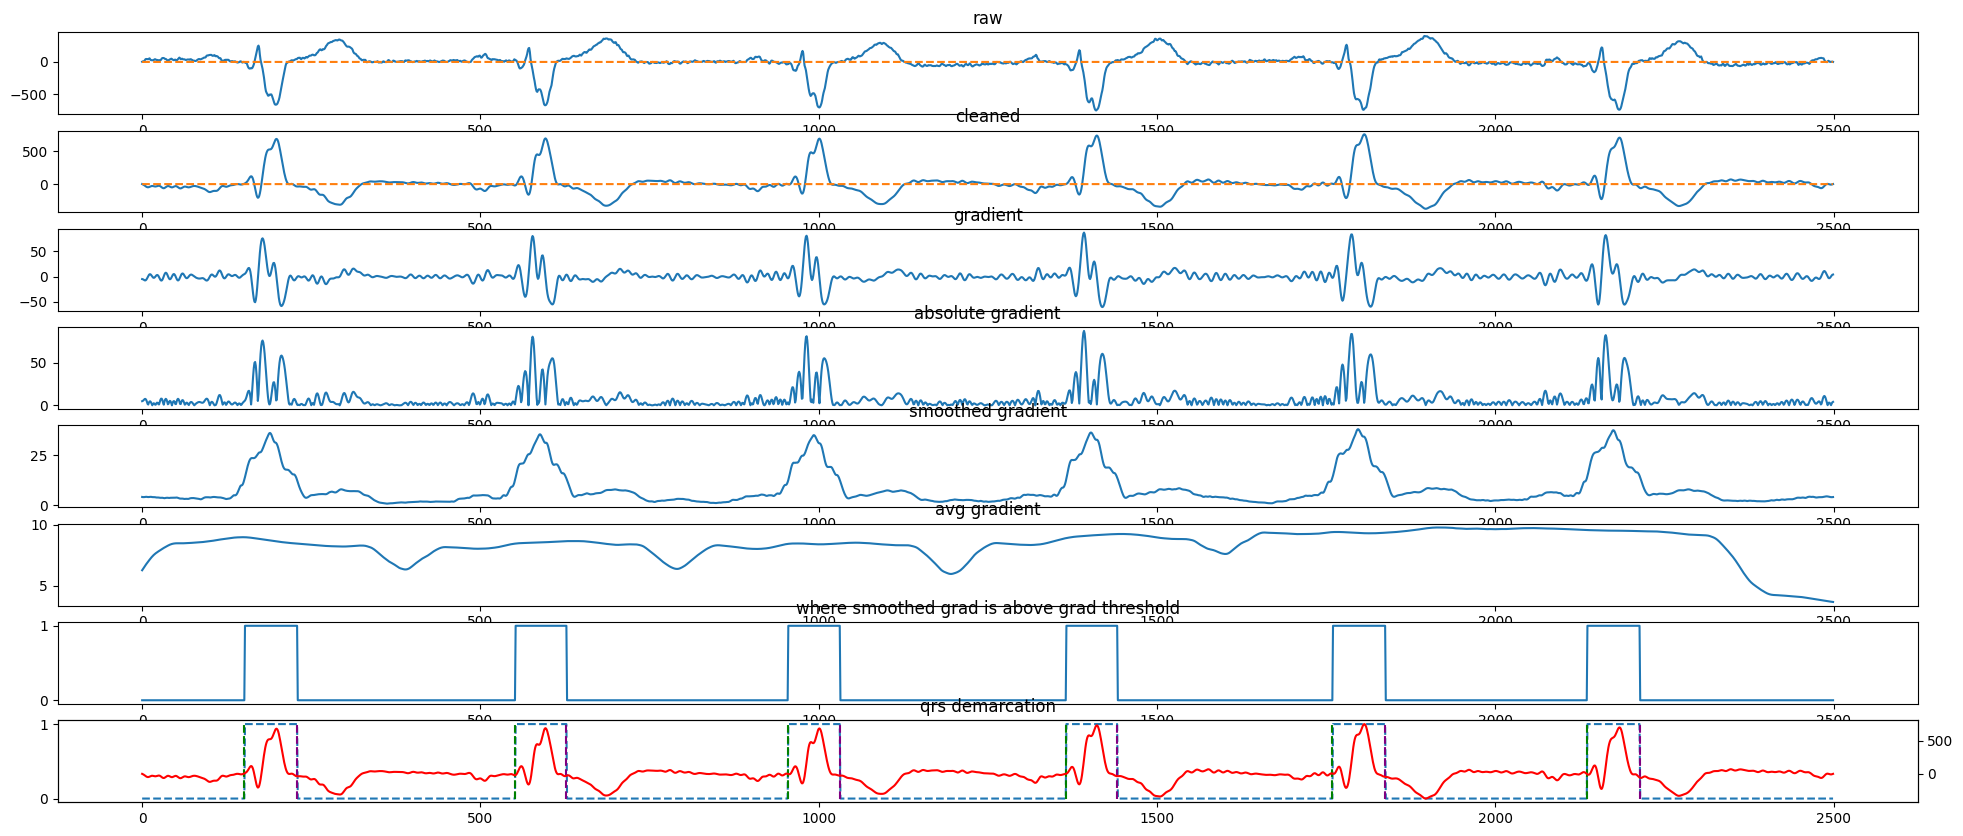

In [27]:
V1_healthy_raw = recording_good[6][:2500]
inv_V1_RBBB_raw = V1_healthy_raw * -1


ecg_clean = nk.ecg_clean(V1_healthy_raw, sampling_rate=sampling_rate, method='biosppy')

signal_gradient = np.gradient(ecg_clean)

absgrad = np.abs(signal_gradient)
smooth_kernel = int(np.rint(smoothwindow * sampling_rate))
avg_kernel = int(np.rint(avgwindow * sampling_rate))

smoothgrad = nk.signal.signal_smooth(absgrad, kernel="boxcar", size=smooth_kernel)
avggrad = nk.signal.signal_smooth(smoothgrad, kernel="boxcar", size=avg_kernel)
gradthreshold = gradthreshweight * avggrad

mindelay = int(np.rint(sampling_rate * mindelay))
qrs = smoothgrad > gradthreshold
beg_qrs = np.where(np.logical_and(np.logical_not(qrs[0:-1]), qrs[1:]))[0]
end_qrs = np.where(np.logical_and(qrs[0:-1], np.logical_not(qrs[1:])))[0]
qrs_durations = end_qrs - beg_qrs


figure, axis = plt.subplots(8, 1)

figure.set_size_inches(24,10)
axis[0].plot(x, inv_V1_RBBB_raw)
axis[0].plot(x, np.zeros(len(x)), linestyle='dashed')
axis[0].set_title("raw")

axis[1].plot(x, ecg_clean)
axis[1].plot(x, np.zeros(len(x)), linestyle='dashed')
axis[1].set_title("cleaned")

axis[2].plot(range(len(signal_gradient)), signal_gradient)
axis[2].set_title("gradient")


axis[3].plot(range(len(absgrad)), absgrad)
axis[3].set_title("absolute gradient")

axis[4].plot(range(len(smoothgrad)), smoothgrad)
axis[4].set_title("smoothed gradient")

axis[5].plot(range(len(avggrad)), avggrad)
axis[5].set_title("avg gradient")

axis[6].plot(range(len(qrs)), qrs)
axis[6].set_title("where smoothed grad is above grad threshold")

axis[7].plot(range(len(qrs)), qrs, linestyle='dashed')
ax2 = axis[7].twinx() 
ax2.plot(x, ecg_clean, color='red')
axis[7].vlines(beg_qrs, ymin=np.zeros(len(beg_qrs)), ymax=np.ones(len(beg_qrs)), color='green', linestyle='dashed')
axis[7].vlines(end_qrs, ymin=np.zeros(len(end_qrs)), ymax=np.ones(len(end_qrs)), color='purple', linestyle='dashed')

axis[7].set_title("qrs demarcation")

print(qrs_durations)


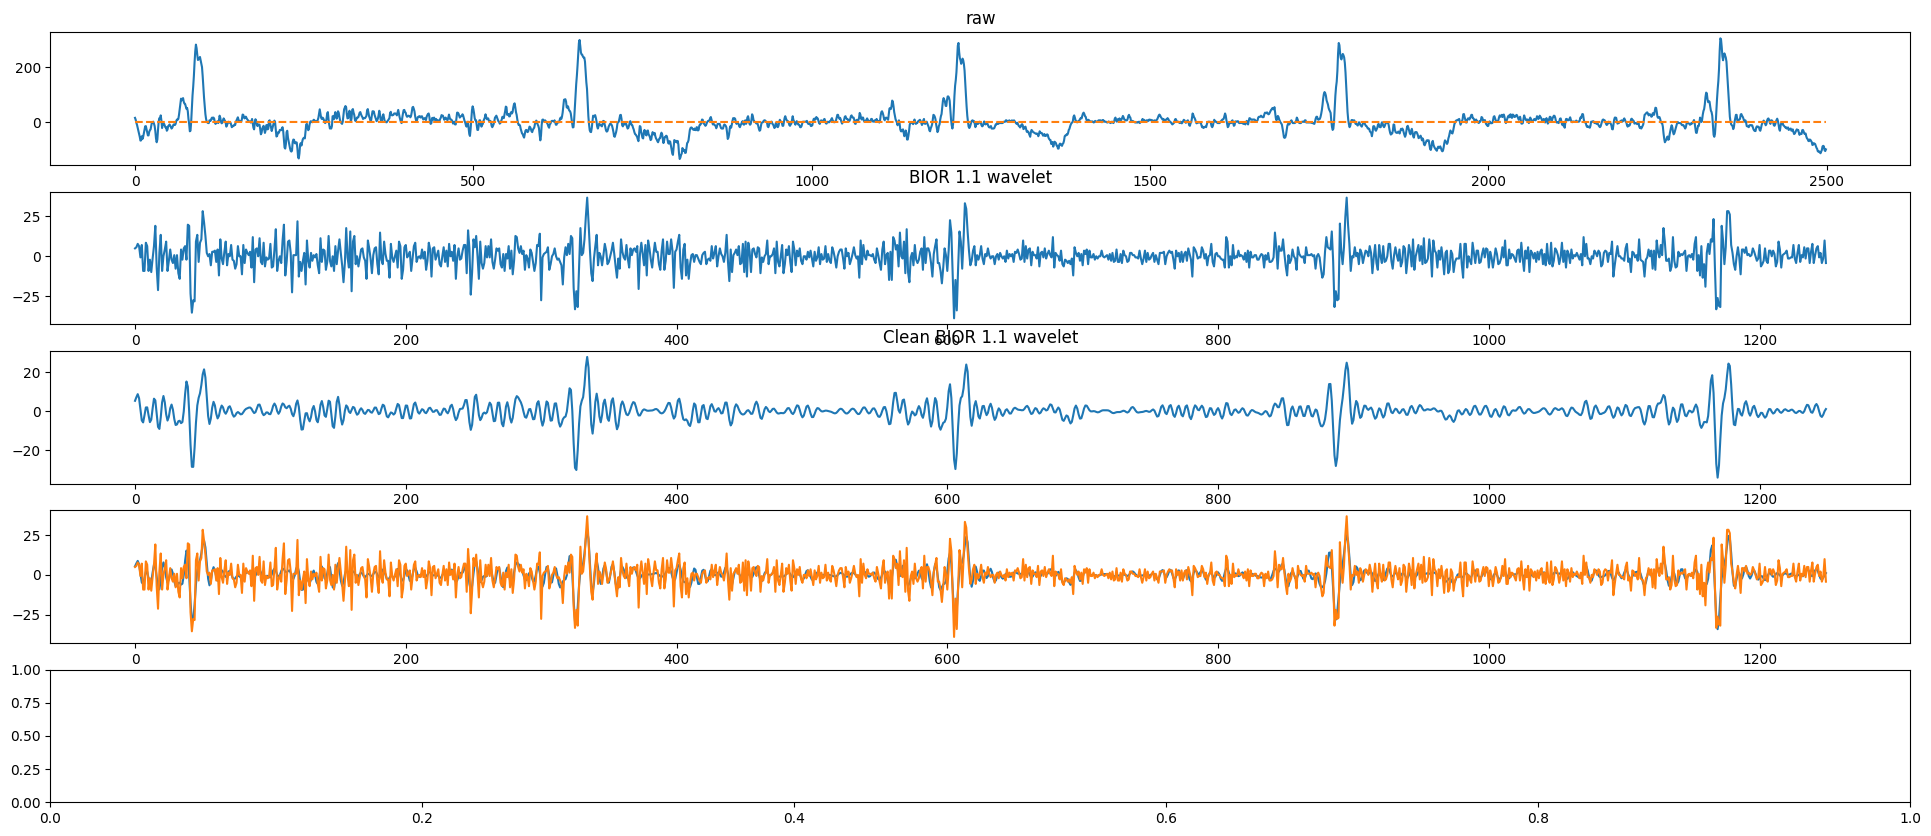

In [28]:
(cA, cD) = pywt.dwt(V1_RBBB_raw, 'bior1.1')
ecg_clean = nk.ecg_clean(V1_RBBB_raw, sampling_rate=sampling_rate, method='biosppy')
(cleanA, cleancD) = pywt.dwt(ecg_clean, 'bior1.1')
(haarcA, haarcD) = pywt.dwt(ecg_clean, 'haar')
(haarrawcA, haarrawcD) = pywt.dwt(V1_RBBB_raw, 'haar')




figure, axis = plt.subplots( 5, 1)

figure.set_size_inches(24,10)
axis[0].plot(x, V1_RBBB_raw)
axis[0].plot(x, np.zeros(len(x)), linestyle='dashed')
axis[0].set_title("raw")

axis[1].plot(range(len(cD)), cD)
axis[1].set_title("BIOR 1.1 wavelet")

axis[2].plot(range(len(cleancD)), cleancD)
axis[2].set_title("Clean BIOR 1.1 wavelet")


axis[3].plot(range(len(haarcD)), haarcD)
axis[3].plot(range(len(haarcD)), haarrawcD)


In [29]:

def get_0_crossings(biorcD, beg_qrs, end_qrs, threshold=15, show=False, **kwargs):
    bior_qrs_beg = beg_qrs // 2
    bior_qrs_end = end_qrs // 2
    
    biorcD_widnows_beat = [biorcD[bior_qrs_beg[i]:bior_qrs_end[i]] for i in range(len(bior_qrs_beg)) if bior_qrs_end[i] - bior_qrs_beg[i] > threshold ]
    biorcD_min_max_beat = []
    
    for wind in biorcD_widnows_beat :
        argmin = np.argmin(wind)
        argmax = np.argmax(wind)
        if argmax > argmin:
            biorcD_min_max_beat.append(wind[argmin:argmax])
        else:
            biorcD_min_max_beat.append(wind[argmax:argmin])
    
    crossing_0 = [((window[:-1] * window[1:]) < 0).sum() for window in biorcD_min_max_beat]
    
    if show:
        figure, axis = plt.subplots(5, 1)
        figure.set_size_inches(24,10)
        for i in range(len(biorcD_widnows_beat)):
            beat = biorcD_widnows_beat[i]
            x= range(len(beat))
            axis[i].bar(x, beat)
            axis[i].bar(x, np.zeros(len(x)), linestyle='dashed')

    return crossing_0


def get_qrs_beginning_and_end(recording, smoothwindow=0.1, avgwindow=0.75, gradthreshweight=1.5, minlenweight=0.4, mindelay=0.3, sampling_rate=500, **kwargs):    
    ecg_clean = nk.ecg_clean(recording, sampling_rate=sampling_rate, method='biosppy')
    signal_gradient = np.gradient(ecg_clean)
    absgrad = np.abs(signal_gradient)
    smooth_kernel = int(np.rint(smoothwindow * sampling_rate))
    avg_kernel = int(np.rint(avgwindow * sampling_rate))
    smoothgrad = nk.signal.signal_smooth(absgrad, kernel="boxcar", size=smooth_kernel)
    avggrad = nk.signal.signal_smooth(smoothgrad, kernel="boxcar", size=avg_kernel)
    gradthreshold = gradthreshweight * avggrad
    mindelay = int(np.rint(sampling_rate * mindelay))
    qrs = smoothgrad > gradthreshold
    beg_qrs_tmp = np.where(np.logical_and(np.logical_not(qrs[0:-1]), qrs[1:]))[0]
    end_qrs_tmp = np.where(np.logical_and(qrs[0:-1], np.logical_not(qrs[1:])))[0]
    # Throw out QRS-ends that precede first QRS-start.
    end_qrs_tmp = end_qrs_tmp[end_qrs_tmp > beg_qrs_tmp[0]]

     # Identify R-peaks within QRS (ignore QRS that are too short).
    num_qrs = min(beg_qrs_tmp.size, end_qrs_tmp.size)
    min_len = np.mean(end_qrs_tmp[:num_qrs] - beg_qrs_tmp[:num_qrs]) * minlenweight
    beg_qrs = []
    end_qrs = []

    for i in range(num_qrs):
        beg = beg_qrs_tmp[i]
        end = end_qrs_tmp[i]
        len_qrs = end - beg

        if len_qrs < min_len:
            continue
        else:
            beg_qrs.append(beg)
            end_qrs.append(end)
            
    return np.array(beg_qrs), np.array(end_qrs)

def analyse_notched_signal(recording, **kwargs):
    beg_qrs, end_qrs = get_qrs_beginning_and_end(recording, **kwargs)
    (cA, cD) = pywt.dwt(recording, 'bior1.1')
    avg_0_crossing = np.mean(get_0_crossings(cD, beg_qrs, end_qrs, **kwargs))
    if avg_0_crossing > 1.5:
        return 1
    else:
        return 0


print(analyse_notched_signal(V1_RBBB_raw))
print(analyse_notched_signal(V1_healthy_raw))

1
1


In [30]:
#This is the old approach to check if the signal is notched
def has_rsR_complex(recording, threshold=20):
    ecg, inverted = nk.ecg_invert(recording, sampling_rate=500)
    coeff_bigger_20 = []
    #For V1 with rSR there should be no inversion. If V1 is healthy inversion would occurr
    if not inverted:
        signals, info = nk.ecg_process(ecg, sampling_rate=500)
        num_peaks = len(info['ECG_R_Peaks'])
        result = []
        for i in range(num_peaks):
            r = info['ECG_R_Peaks'][i]
            r_on = info['ECG_R_Onsets'][i]
            r_off = info['ECG_R_Offsets'][i]
            p_on = info['ECG_P_Onsets'][i]
            t_off = info['ECG_T_Offsets'][i]
  
            if np.isnan([r, r_on, r_off, p_on, t_off]).any():
                continue
            else:
                # if signals.iloc[r_on]['ECG_Raw'] > 0:
                #     result.append(any(signals.iloc[r_on-threshold:r]['ECG_Raw'] < 0))
                # else:
                    #TODO? What if R_onset is not positive?
                    # Lets see how many times we crossed from positive to negative again, if > 0 between ron and r then its rsr
                    # pos_to_neg_changes = sum((np.diff(signals.iloc[r_on:r]['ECG_Raw']) > 0).astype(int))<0
                    # print((np.diff(signals.iloc[r_on:r]['ECG_Raw']) > 0).astype(int))
                pos_to_neg_changes = sum(np.diff(np.diff(signals.iloc[r_on-threshold:r]['ECG_Raw']) > 0).astype(int))
                (db_cA, db_cD) = pywt.dwt(signals.iloc[p_on: t_off]['ECG_Clean'], 'db2')
                coeff_bigger_20.append(sum(db_cD > 2.5))

                result.append(pos_to_neg_changes>5)

        return int(any(result))
    else:
        rec_clean = nk.ecg_clean(recording, method='pantompkins1985', sampling_rate=500)
        signals, info = nk.ecg_process(rec_clean, sampling_rate=500)
        num_peaks = len(info['ECG_R_Peaks'])
        result = []
        for i in range(num_peaks):
            r = info['ECG_R_Peaks'][i]
            r_on = info['ECG_R_Onsets'][i]
            r_off = info['ECG_R_Offsets'][i]
            p_on = info['ECG_P_Onsets'][i]
            t_off = info['ECG_T_Offsets'][i]
  
            if np.isnan([r, r_on, r_off, p_on, t_off]).any():
                continue
            else:
                # if signals.iloc[r_on]['ECG_Raw'] > 0:
                #     result.append(any(signals.iloc[r_on-threshold:r]['ECG_Raw'] < 0))
                # else:
                    #TODO? What if R_onset is not positive?
                    # Lets see how many times we crossed from positive to negative again, if > 0 between ron and r then its rsr
                    # pos_to_neg_changes = sum((np.diff(signals.iloc[r_on:r]['ECG_Raw']) > 0).astype(int))<0
                    # print((np.diff(signals.iloc[r_on:r]['ECG_Raw']) > 0).astype(int))
                pos_to_neg_changes = sum(np.diff(np.diff(signals.iloc[r: r_off]['ECG_Raw']) > 0).astype(int)) 
                result.append(pos_to_neg_changes>7)
                (db_cA, db_cD) = pywt.dwt(signals.iloc[p_on: t_off]['ECG_Clean'], 'db2')
                coeff_bigger_20.append(sum(db_cD > 5) )
              
        return int(any(result))
        # return -1
        

print(has_rsR_complex(recording[6]))
print(has_rsR_complex(recording_good[6]))
    

1
0


In [31]:
class_files={}
for i in range(len(header_files)):
    header = load_header(header_files[i])
    labels = clean_labels(header)
    #tylko główna diagnoza
    l = labels[0]
    if l in class_files:
        class_files[l].append((header_files[i], recording_files[i]))
        
    else:
        class_files[l]=[(header_files[i], recording_files[i])]

for k, v in class_files.items():
    print(k, len(v))


426783006 135
164884008 98
164889003 173
429622005 111
59118001 250
164931005 30
270492004 103
284470004 74
164909002 26


In [32]:
has_rsr = []
has_notched_signal = []
coeffs = []
for header_file, recording_file in class_files['59118001']:
    header = load_header(header_file)
    rec = np.array(load_recording(recording_file), dtype=np.float32)
    has_rsr.append(has_rsR_complex(rec[6]))
    has_notched_signal.append(analyse_notched_signal(rec[6]))
    coeffs.append( pywt.dwt(rec[6], 'coif2'))

    
print(has_rsr)
print(has_notched_signal)
    

[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

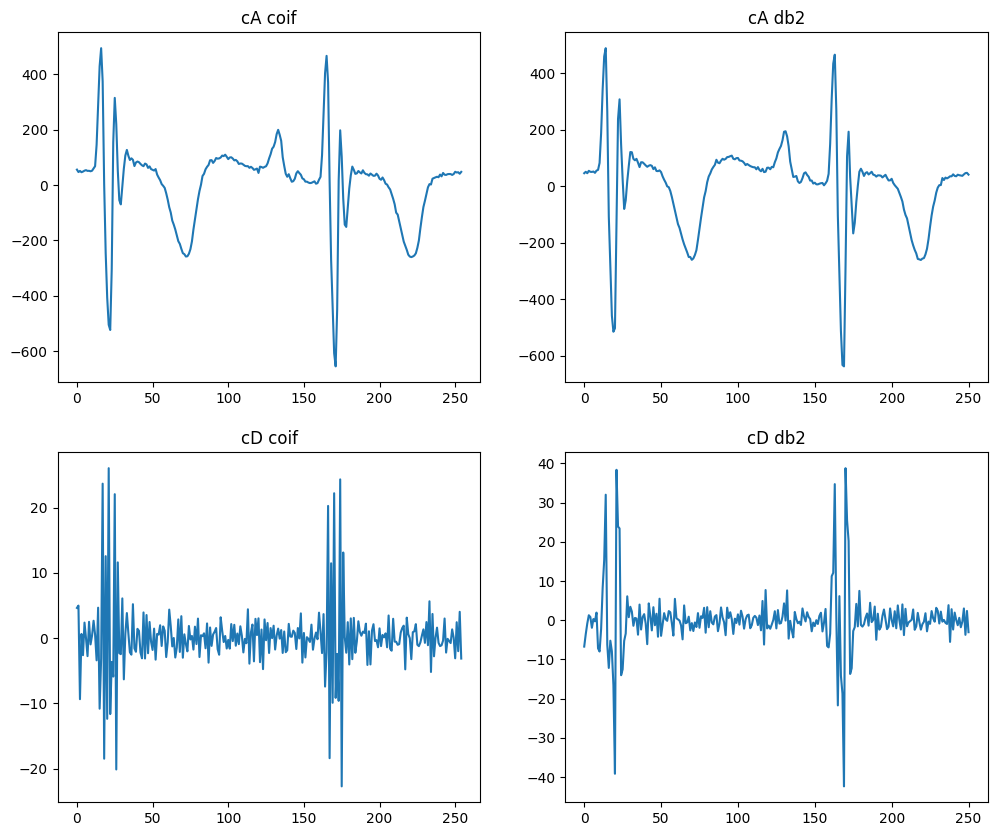

8


In [33]:
header_file, recording_file = class_files['59118001'][-4]
header = load_header(header_file)
rec = np.array(load_recording(recording_file), dtype=np.float32)
(cA, cD) = pywt.dwt(rec[6][:500], 'coif2')
(db_cA, db_cD) = pywt.dwt(rec[6][:500], 'db2')

x = range(len(cA))

figure, axis = plt.subplots(2, 2)
figure.set_size_inches(12,10)
axis[0, 0].plot(x, cA)
axis[0, 0].set_title("cA coif")

axis[1, 0].plot(x, cD)
axis[1, 0].set_title("cD coif")

x = range(len(db_cA))
axis[0, 1].plot(x, db_cA)
axis[0, 1].set_title("cA db2")

axis[1, 1].plot(x, db_cD)
axis[1, 1].set_title("cD db2")

plt.show()

print(sum(db_cD > 20))

[13 15 13 10 11 10 13 14 11 14 10 15 13 16 21 19 11 10]


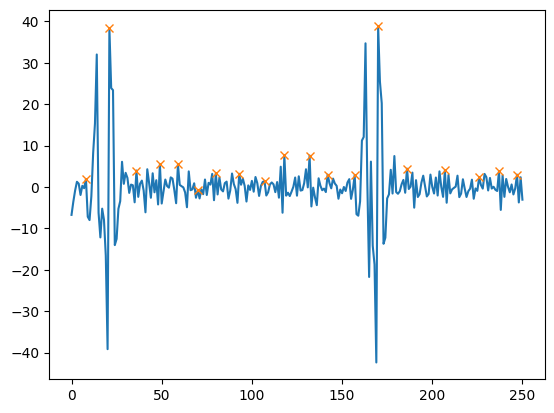

In [34]:
peaks, _ = find_peaks(db_cD, distance=10)
print(np.diff(peaks))
plt.plot(db_cD)
plt.plot(peaks, db_cD[peaks], "x")
plt.show()

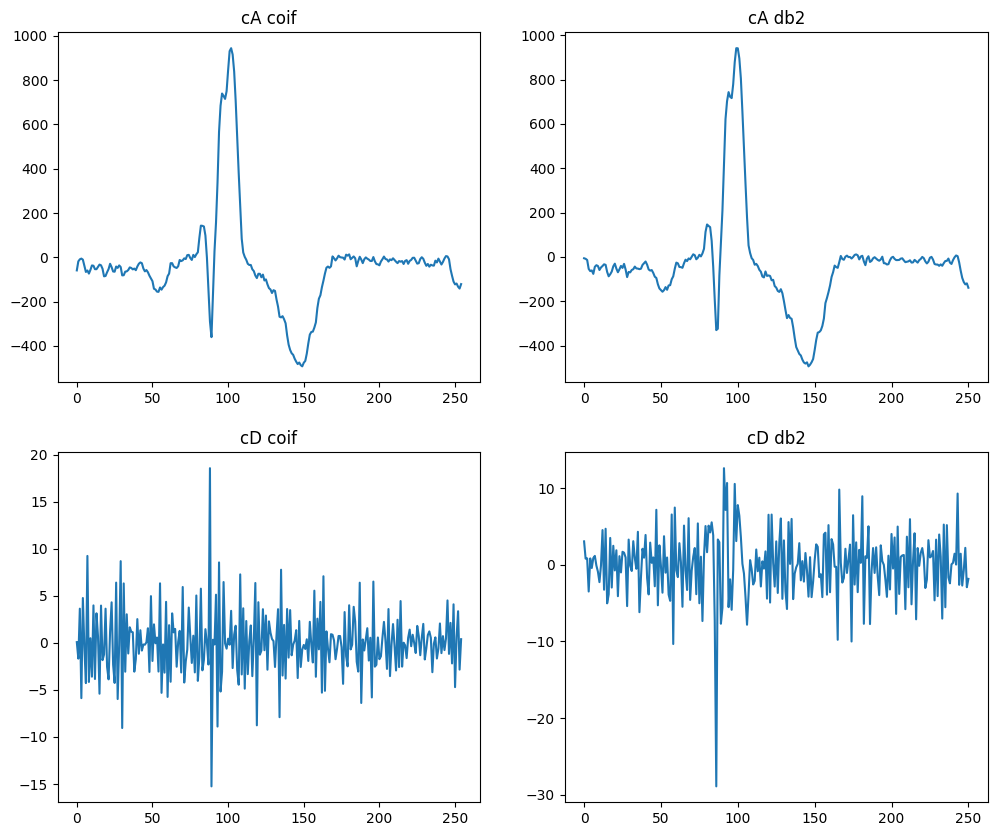

In [35]:
(cA, cD) = pywt.dwt(recording_good[6][:500], 'coif2')
(db_cA, db_cD) = pywt.dwt(recording_good[6][:500], 'db2')
# (cA, cD) = pywt.dwt(recording_good[6][500:1500], 'coif2')
# (db_cA, db_cD) = pywt.dwt(recording_good[6][500:1500], 'db2')


x = range(len(cA))

figure, axis = plt.subplots(2, 2)
figure.set_size_inches(12,10)
axis[0, 0].plot(x, cA)
axis[0, 0].set_title("cA coif")

axis[1, 0].plot(x, cD)
axis[1, 0].set_title("cD coif")

x = range(len(db_cA))
axis[0, 1].plot(x, db_cA)
axis[0, 1].set_title("cA db2")

axis[1, 1].plot(x, db_cD)
axis[1, 1].set_title("cD db2")

plt.show()

[12 14 12 12 10 12 12 15 14 18 18 19 10 19 12 11 12]


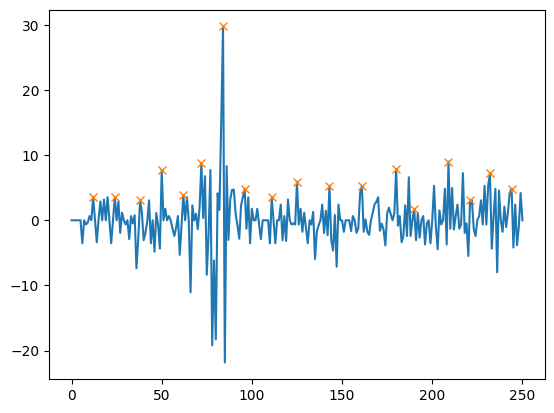

In [25]:
peaks, _ = find_peaks(db_cD, distance=10)
print(np.diff(peaks))
plt.plot(db_cD)
plt.plot(peaks, db_cD[peaks], "x")
plt.show()

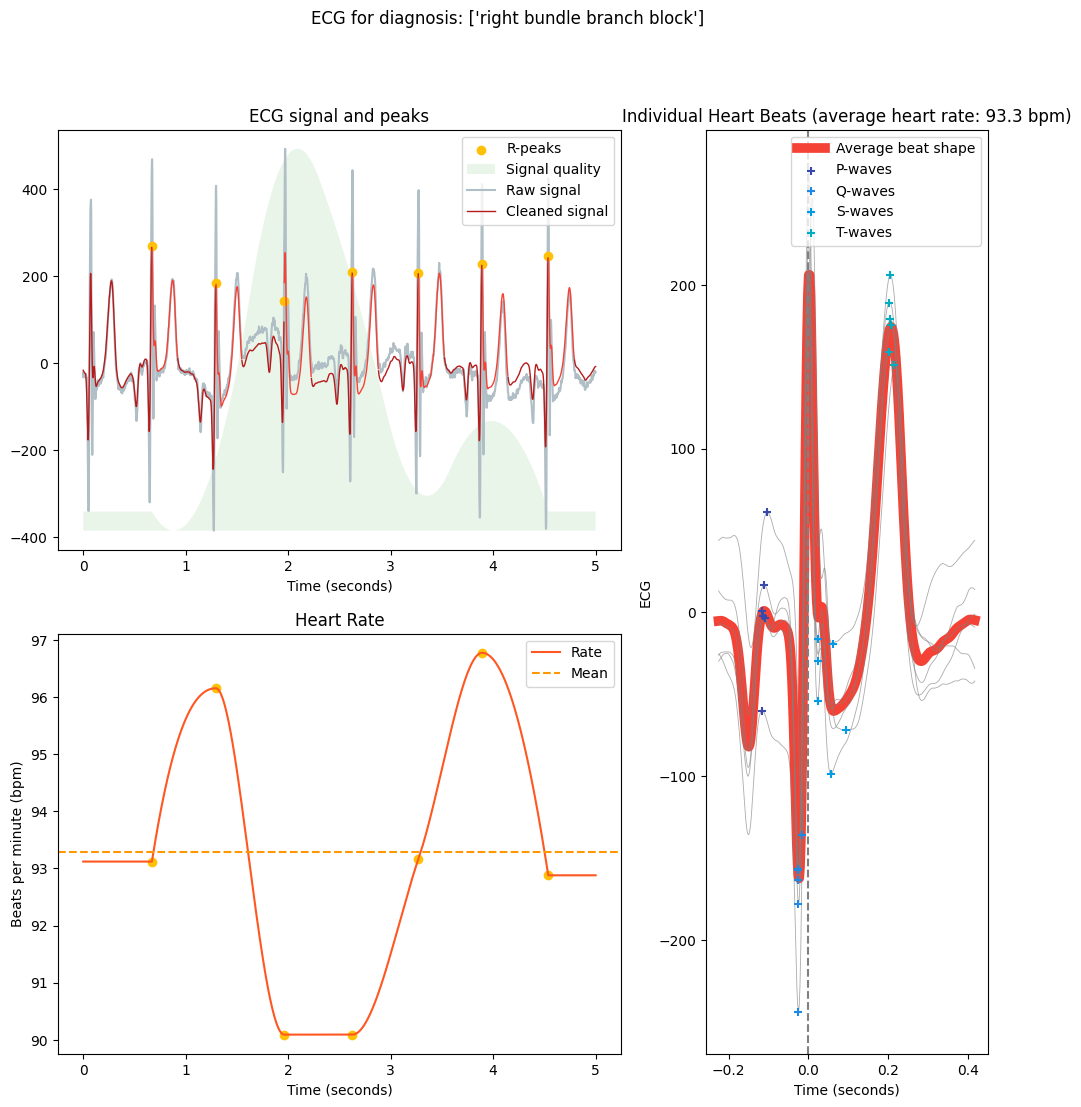

[0.086, 0.082, 0.11, 0.048, 0.048, 0.048]


In [26]:
header_file, recording_file = class_files['59118001'][-4]
header = load_header(header_file)
rec = np.array(load_recording(recording_file), dtype=np.float32)
ecg, inverted = nk.ecg_invert(rec[6][:2500], sampling_rate=500)
signals, info = nk.ecg_process(ecg, sampling_rate=500)
nk.ecg_plot(signals, info)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")
plt.show()
print(get_QRS_duration(signals, info))


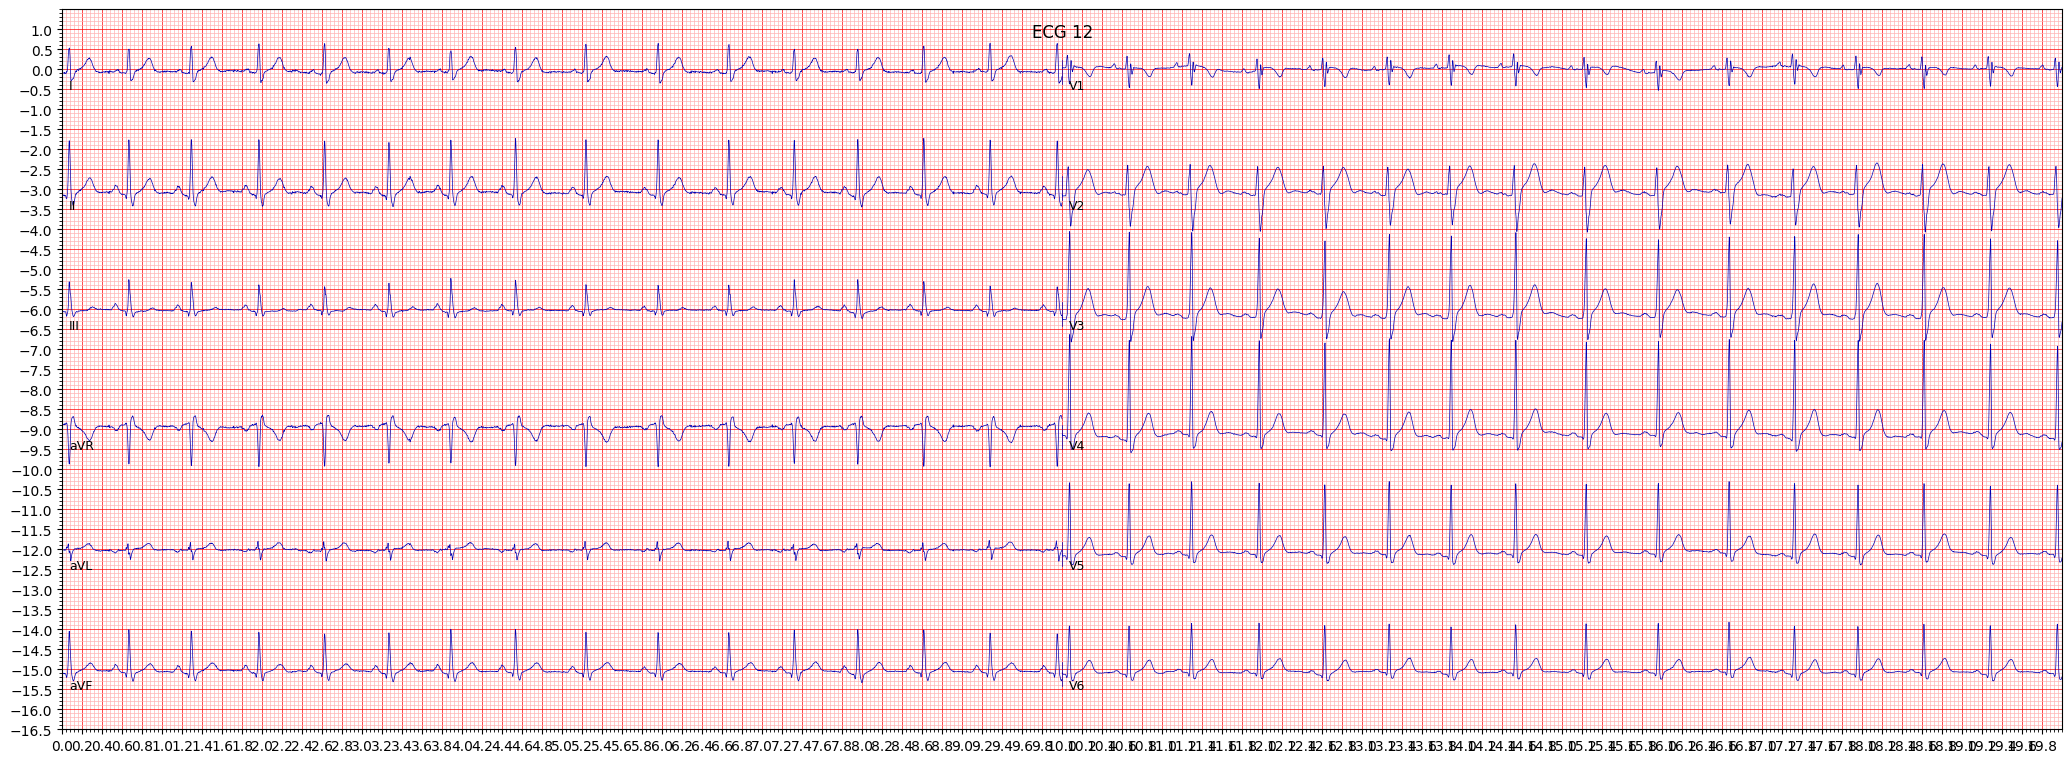

In [27]:
ecg_plot.plot(rec / 1000, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()

# Analysis of LBBB
- Wide Iterlocked R in V5, V6 and aVL
- no Q in I, V5 and V6
- QRS > 120ms
- widened S of more than 60ms in V5 and V6 (eventualy I or aVL)
- ST-T leaning oposite to QRS in V5 V6

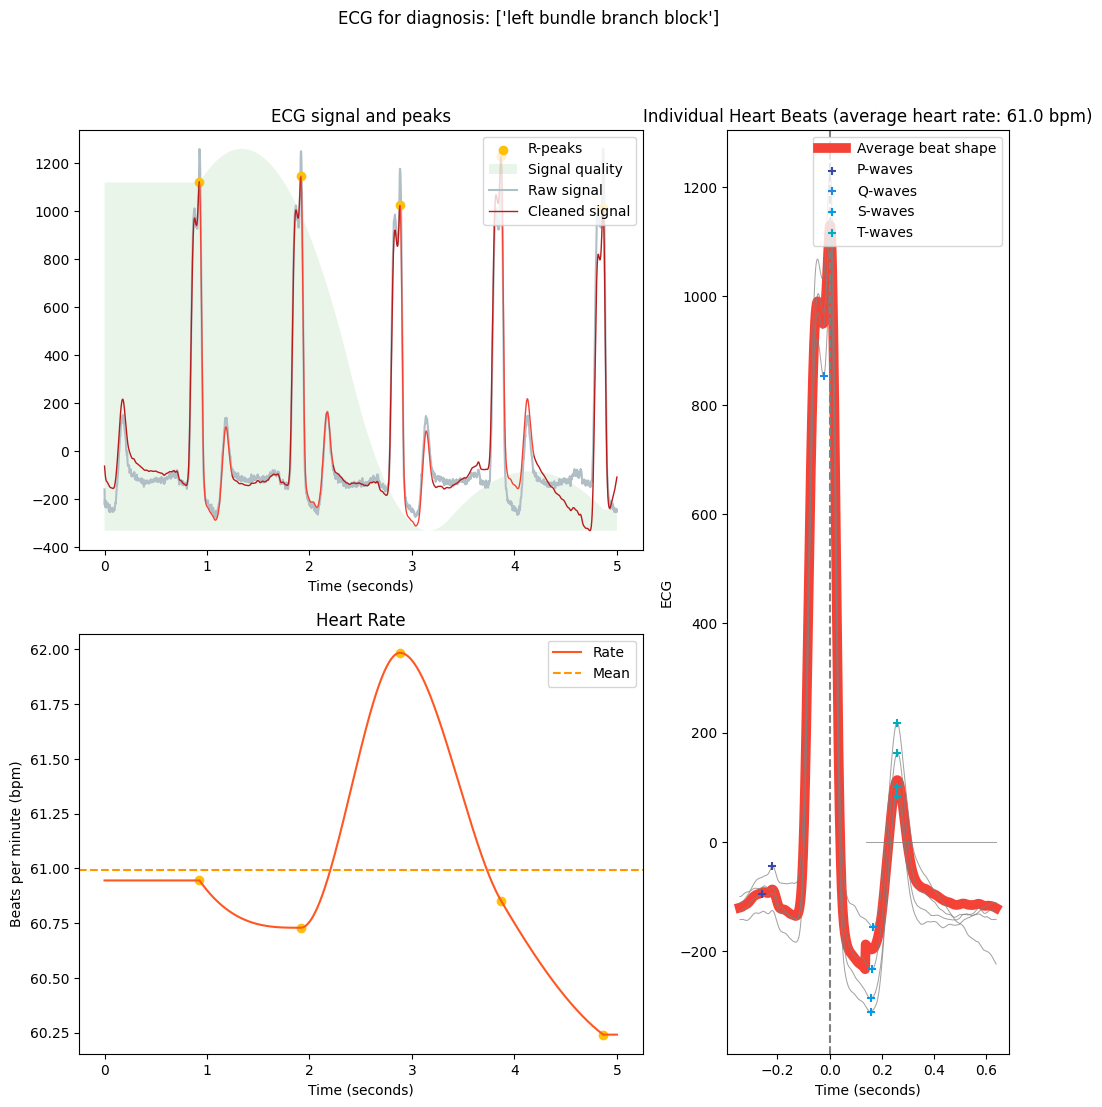

In [73]:
coeffs = []
header_file, recording_file = class_files['164909002'][7]
header = load_header(header_file)
rec = np.array(load_recording(recording_file), dtype=np.float32)
current_labels= clean_labels(header)
current_abbreviations=[labels_to_class[int(label)] for label in current_labels]
signals, info = nk.ecg_process(rec[11][:2500], sampling_rate=500)
pywt.dwt(rec[11], 'coif2')
nk.ecg_plot(signals, info)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")
plt.show()


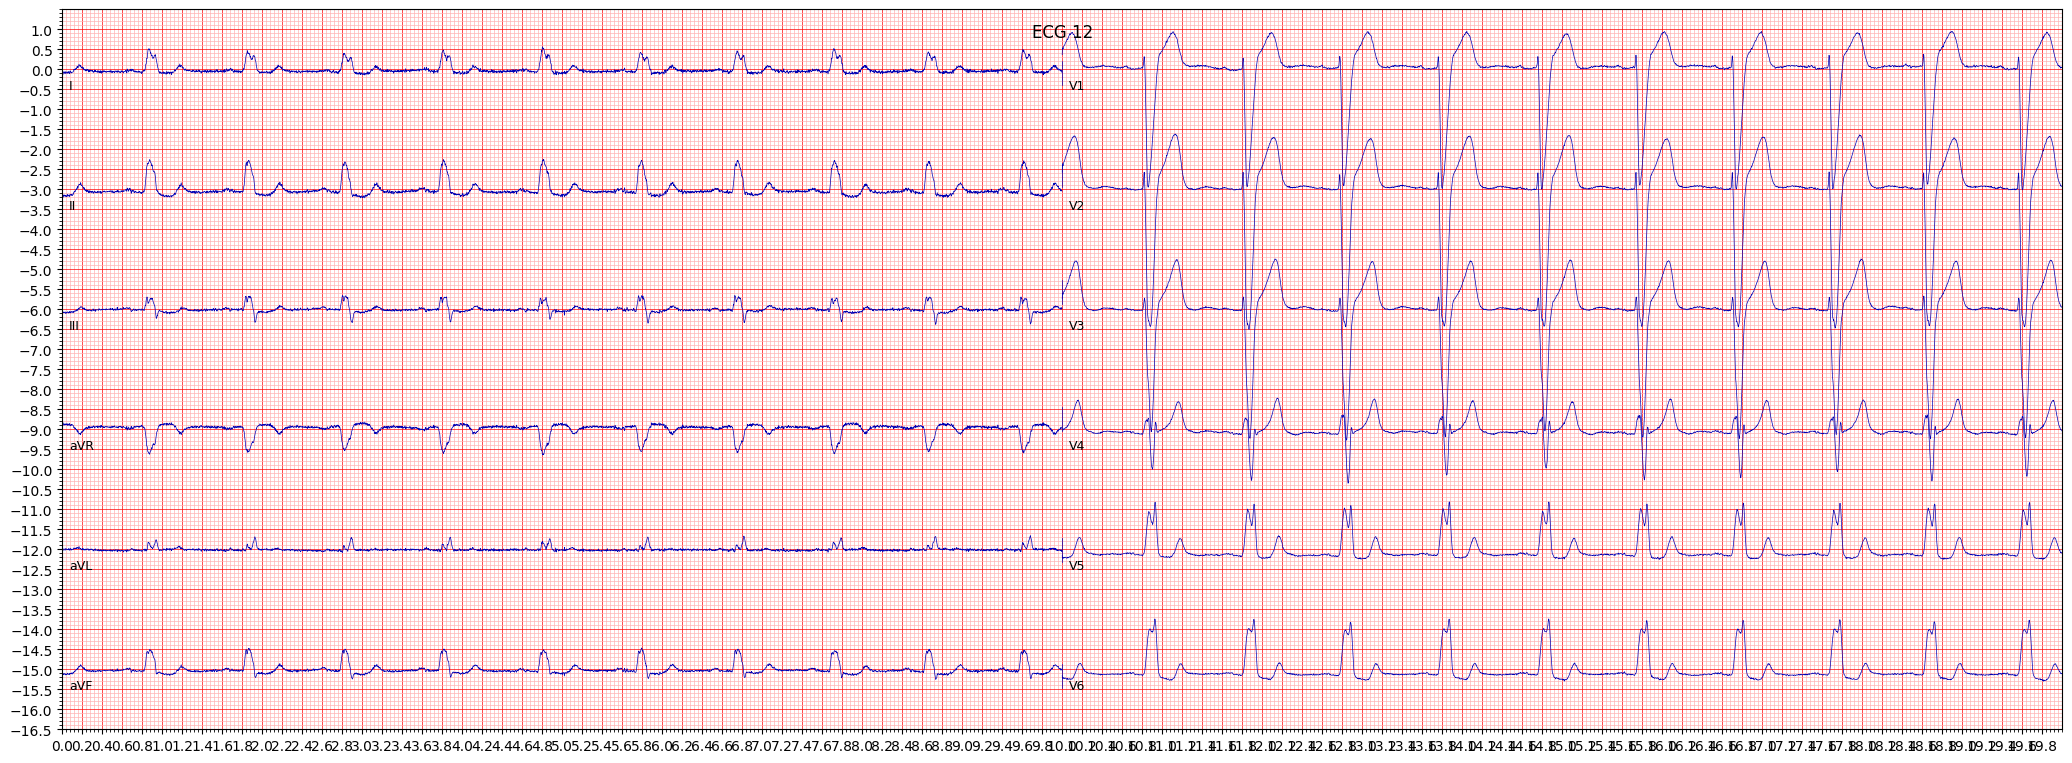

In [71]:
ecg_plot.plot(rec[:][:2500] / 1000, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()

[0.18]
[]


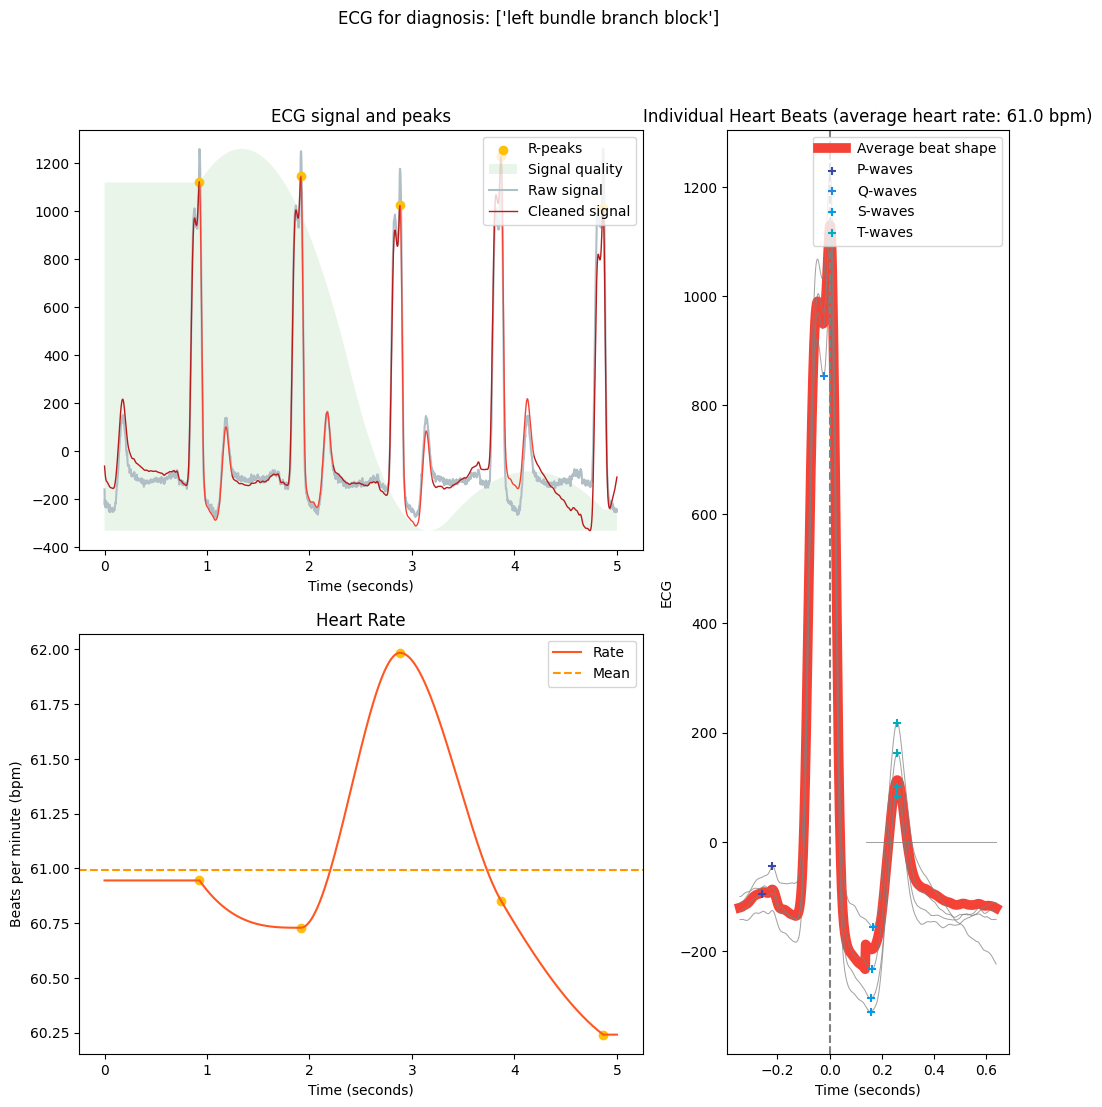

In [75]:
signals, info= nk.ecg_process(rec[11][:2500], sampling_rate=500)

# Visualise the processing
nk.ecg_plot(signals, info)
fig = plt.gcf() 
fig.set_size_inches(12, 12, forward=True)
fig.suptitle(f"ECG for diagnosis: {current_abbreviations}")

print(get_QRS_duration(signals, info))
print(get_R_duration(signals, info))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']


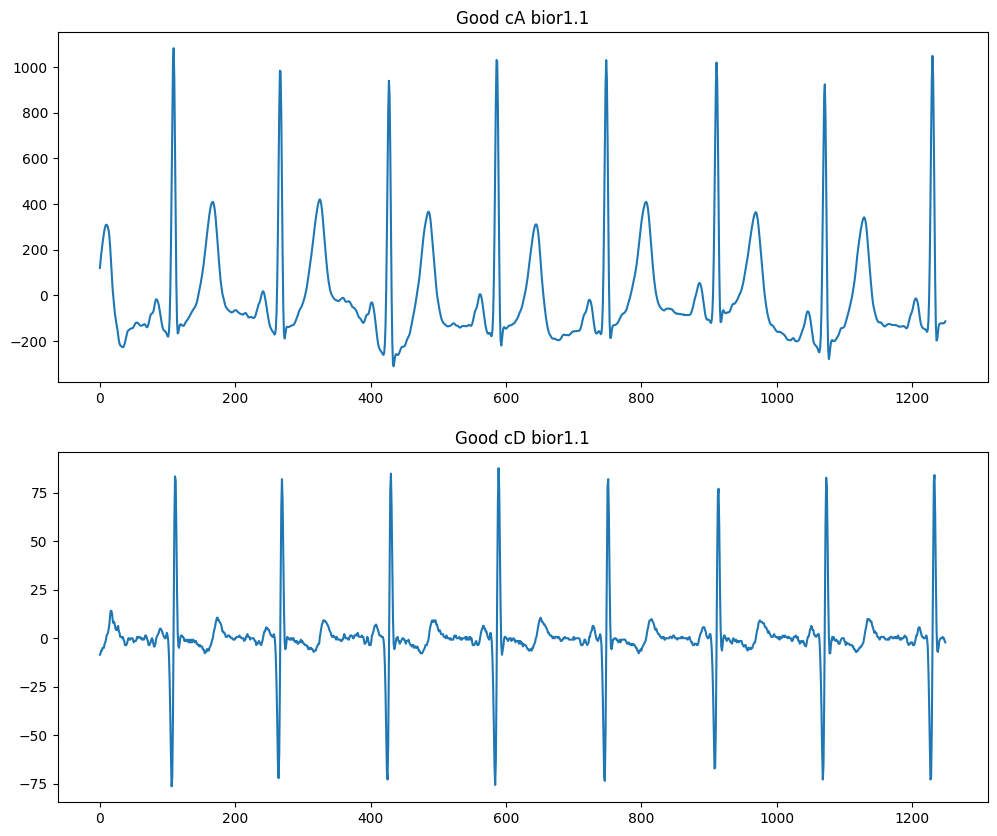

In [76]:
print(pywt.wavelist("bior"))
(cA, cD) = pywt.dwt(rec[11][:2500], 'bior1.1')
(good_cA, good_cD) = pywt.dwt(recording_good[11][:2500], 'bior1.1')


x = range(len(cA))

figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12,10)
axis[0].plot(x, good_cA)
axis[0].set_title("Good cA bior1.1")

axis[1].plot(x, good_cD)
axis[1].set_title("Good cD bior1.1")


plt.show()

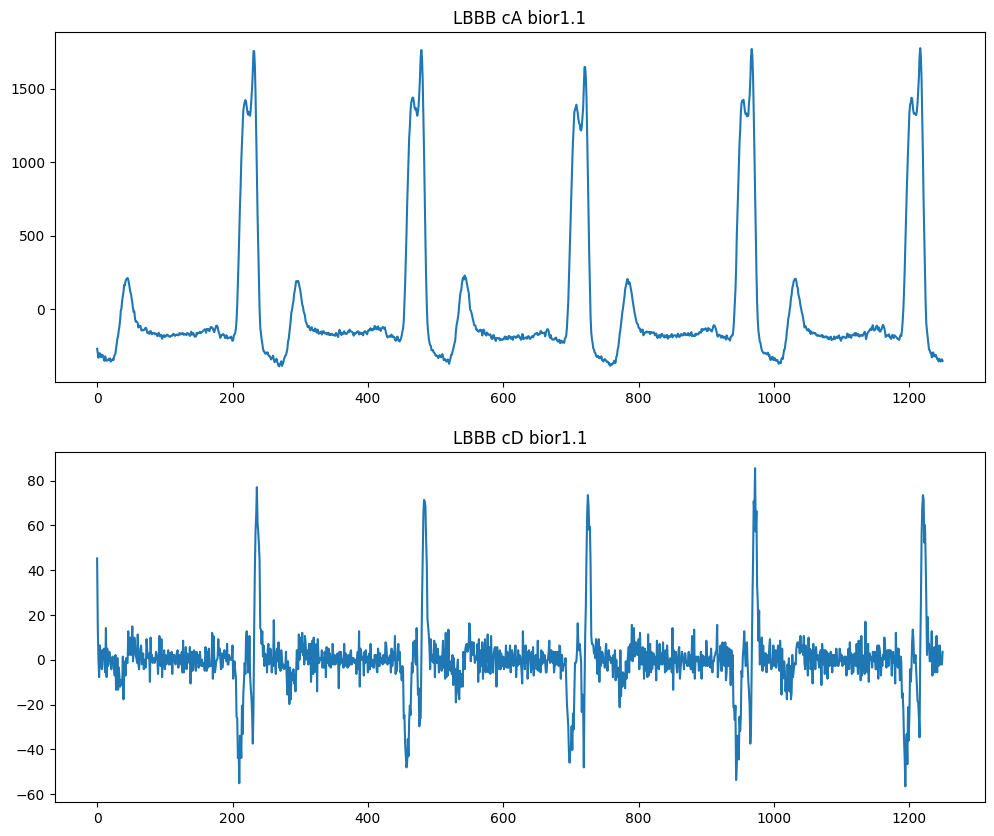

In [77]:
x = range(len(cA))

figure, axis = plt.subplots(2, 1)
figure.set_size_inches(12,10)
axis[0].plot(x, cA)
axis[0].set_title("LBBB cA bior1.1")

axis[1].plot(x, cD)
axis[1].set_title("LBBB cD bior1.1")
plt.show()


# Building features vector

In [137]:
def analyse_recording(rec, leads_idxs, label, sampling_rate=500):
    analysed_results = {}
    for lead_name, idx in leads_idxs.items():
        rec_clean = nk.ecg_clean(rec[idx], method="pantompkins1985", sampling_rate=sampling_rate)
        signal, info =nk.ecg_process(rec_clean, sampling_rate=sampling_rate)
        bpm = np.mean(nk.ecg_rate(signal, sampling_rate))
        missing_qrs = has_missing_qrs(signals, info)
        missing_p = has_missing_p(signals, info)
        qrs_duration = np.mean(get_QRS_duration(signals, info))
        s_duration = np.mean(get_S_duration(signals, info))
        rhythm = leading_rythm(bpm)
        # rsr = has_rsR_complex(rec[idx], sampling_rate)
        nothed = analyse_notched_signal(rec[idx])

        analysed_results[lead_name]={
            'signal': signal,
            'info': info,
            'bpm': bpm, 
            'missing_qrs':missing_qrs, 
            'missing_p': missing_p, 
            'qrs_duration':qrs_duration, 
            's_duration':s_duration,
            'rhythm': rhythm,
            # 'has_rsr': rsr,
            'notched': nothed,
        }
        
    heart_axis = None
    rhythm_origin = None
    if 'I' in leads_idx:
        if 'II' in leads_idx:
            rhythm_origin = get_rhythm_origin(analysed_results['I']['signal'], analysed_results['I']['info'], analysed_results['II']['signal'], analysed_results['II']['info'])
        if 'aVF' in leads_idx:
            if 'II' not in leads_idx:
                rhythm_origin = get_rhythm_origin(analysed_results['I']['signal'], analysed_results['I']['info'], analysed_results['aVF']['signal'], analysed_results['aVF']['info'])
            heart_axis = get_heart_axis(get_QRS_from_lead(analysed_results['I']['signal'], analysed_results['I']['info']), get_QRS_from_lead(analysed_results['aVF']['signal'], analysed_results['aVF']['info']))
    
    
    if heart_axis:
        analysed_results['heart_axis']=np.mean(heart_axis)

    if rhythm_origin:
        analysed_results['rhythm_origin_vertical']=rhythm_origin[0]
        analysed_results['rhythm_origin_horizontal']=rhythm_origin[1]



    analysed_results['label'] = label
    
    for lead_name, idx in leads_idxs.items():
        analysed_results[lead_name].pop('signal', None)
        analysed_results[lead_name].pop('info', None)

    
    return analysed_results

        

    
    

In [139]:
data_analysis = []
broken_records= []
leads_idx = {'I': 0, 'II': 1, 'III':2, 'aVR': 3, 'aVL':4, 'aVF':5, 'V1':6, 'V2':7, 'V3':8, 'V4':9, 'V5':10, 'V6':11}
data = [class_files[key] for key in ['59118001', '164909002', '426783006']]
data_flattened = []
functools.reduce(operator.iconcat, data, data_flattened)
total = len(data_flattened)
counter = 0
for header_file, recording_file in data_flattened:
    print(f"{counter}/{total}")
    header = load_header(header_file)
    current_label= clean_labels(header)[0]
    rec = np.array(load_recording(recording_file), dtype=np.float32)
    if rec.shape[1] < 2500:
        continue

    try:
        result = analyse_recording(rec, leads_idx, current_label)
        data_analysis.append(result)
    except:
        broken_records.append((header_file, recording_file))
        
    counter +=1
    
df = pd.DataFrame.from_records(data_analysis)
df.to_json("/Users/puszkarb/phd/phd_nbeats_with_feature_vector/notebooks/trainig_data_notched.json")


0/411
1/411
2/411
3/411
4/411
5/411
6/411
7/411
8/411
9/411
10/411
11/411
12/411
13/411
14/411
15/411
16/411
17/411
18/411
19/411
20/411
21/411
22/411
23/411
24/411
25/411
26/411
27/411
28/411
29/411
30/411
31/411
32/411
33/411
34/411
35/411
36/411
37/411
38/411
39/411
40/411
41/411
42/411
43/411
44/411
45/411
46/411
47/411
48/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


49/411
50/411
51/411
52/411
53/411
54/411
55/411
56/411
57/411
58/411
59/411
60/411
61/411
62/411
63/411
64/411
65/411
66/411
67/411
68/411
69/411
70/411
71/411
72/411
73/411
74/411
75/411
76/411
77/411
78/411
79/411
80/411
81/411
82/411
83/411
84/411
85/411
86/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: Runt

87/411
88/411
89/411
90/411
91/411
92/411
93/411
94/411
95/411
96/411
97/411
98/411
99/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


100/411
101/411
102/411
103/411
104/411
105/411
106/411
107/411
108/411
109/411
110/411
111/411
112/411
113/411
114/411
115/411
116/411
117/411
118/411
119/411
120/411
121/411
122/411
123/411
124/411
125/411
126/411
127/411
128/411
129/411
130/411
131/411
132/411
133/411
134/411
135/411
136/411
137/411
138/411
139/411
140/411
141/411
142/411
143/411
144/411
145/411
146/411
147/411
148/411
149/411
150/411
151/411
152/411
153/411
154/411
155/411
156/411
157/411
158/411
159/411
160/411
161/411
162/411
163/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


164/411
165/411
166/411
167/411
168/411
169/411
170/411
171/411
172/411
173/411
174/411
175/411
176/411
177/411
178/411
179/411
180/411
181/411
182/411
183/411
184/411
185/411
186/411
187/411
188/411
189/411
190/411
191/411
192/411
193/411
194/411
195/411
196/411
197/411
198/411
199/411
200/411
201/411
202/411
203/411
204/411
205/411
206/411
207/411
208/411
209/411
210/411
211/411
212/411
213/411
214/411
215/411
216/411
217/411
218/411
219/411
220/411
221/411
222/411
223/411
224/411
225/411
226/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


227/411
228/411
229/411
230/411
231/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


232/411
233/411
234/411
235/411
236/411
237/411
238/411
239/411
240/411
241/411
242/411
243/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


244/411
245/411
246/411
247/411
248/411
249/411
250/411
251/411
252/411
253/411
254/411
255/411
256/411
257/411
258/411
259/411
260/411
261/411
262/411
263/411
264/411
265/411
266/411
267/411
268/411
269/411
270/411
271/411
272/411
273/411
274/411
275/411
276/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


277/411
278/411
279/411
280/411
281/411
282/411
283/411
284/411
285/411
286/411
287/411
288/411
289/411
290/411
291/411
292/411
293/411
294/411
295/411
296/411
297/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


298/411
299/411
300/411
301/411
302/411
303/411
304/411
305/411
306/411
307/411
308/411
309/411
310/411
311/411
312/411
313/411
314/411
315/411
316/411
317/411
318/411
319/411
320/411
321/411
322/411
323/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


324/411
325/411
326/411
327/411
328/411
329/411
330/411
331/411
332/411
333/411
334/411
335/411
336/411
337/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


338/411
339/411
340/411
341/411
342/411
343/411
344/411
345/411
346/411
347/411
348/411
349/411
350/411
351/411
352/411
353/411
354/411
355/411
356/411
357/411
358/411
359/411
360/411
361/411
362/411
363/411
364/411
365/411
366/411
367/411
368/411
369/411
370/411
371/411
372/411
373/411
374/411
375/411
376/411
377/411
378/411
379/411
380/411
381/411
382/411
383/411
384/411
385/411
386/411
387/411
388/411
389/411
390/411
391/411
392/411
393/411
394/411
395/411
396/411
397/411
398/411
399/411
400/411
401/411
402/411
403/411


/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/puszkarb/phd/phd_nbeats/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


404/411
405/411
406/411
407/411
408/411
409/411
410/411


In [140]:
df = pd.json_normalize(data_analysis)
df

heart_axis  rhythm_origin_vertical  rhythm_origin_horizontal      label  \
0    -71.880261                     1.0                       1.0   59118001   
1    172.407021                     1.0                       1.0   59118001   
2     98.288931                     1.0                       1.0   59118001   
3    134.378383                     1.0                       1.0   59118001   
4    126.301317                     1.0                       1.0   59118001   
..          ...                     ...                       ...        ...   
405  -26.897641                     1.0                       1.0  426783006   
406   59.017908                     1.0                       1.0  426783006   
407  -61.563218                     1.0                       1.0  426783006   
408   81.333672                     1.0                       1.0  426783006   
409   26.657094                     1.0                       1.0  426783006   

          I.bpm  I.missing_qrs  I.missing_p  I.qrs_duration  I.s_duration  \
0    103.723345          False        False        0.159520      0.085640   
1    109.717098          False        False        0.087100      0.037900   
2     93.948834          False        False        0.099467      0.042375   
3     66.475395          False        False        0.104211      0.039158   
4     68.543330          False        False        0.088800      0.042400   
..          ...            ...          ...             ...           ...   
405   76.328201          False        False        0.100615      0.046154   
406  100.793426          False        False        0.079417      0.040750   
407   59.298115          False        False        0.113333      0.041333   
408   71.708754          False        False        0.119784      0.040162   
409   81.244082          False        False        0.107333      0.045619   

     I.rhythm  ...  V5.s_duration  V5.rhythm  V5.notched      V6.bpm  \
0           1  ...       0.042560          1           0  103.698048   
1           1  ...       0.038400          1           0  109.737334   
2           0  ...       0.042625          0           0   93.929582   
3           0  ...       0.042211          0           0   66.475685   
4           0  ...       0.038200          0           0   68.558429   
..        ...  ...            ...        ...         ...         ...   
405         0  ...       0.040154          0           0   76.340239   
406         1  ...       0.038333          1           0  100.812727   
407         0  ...       0.040222          0           0   59.268883   
408         0  ...       0.038324          0           0   71.708063   
409         0  ...       0.038048          0           0   81.239898   

     V6.missing_qrs  V6.missing_p  V6.qrs_duration  V6.s_duration  V6.rhythm  \
0             False         False         0.114000       0.042800          1   
1             False         False         0.099700       0.038000          1   
2             False         False         0.100125       0.042000          0   
3             False         False         0.108842       0.040632          0   
4             False         False         0.091200       0.042600          0   
..              ...           ...              ...            ...        ...   
405           False         False         0.102462       0.040462          0   
406           False         False         0.075083       0.039417          1   
407           False         False         0.107333       0.041333          0   
408           False         False         0.123514       0.039892          0   
409           False         False         0.095333       0.039238          0   

     V6.notched  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
405           0  
406           0  
407           0  
408           0  
409           0  

[410 rows x 88 columns]

In [141]:
y = df.loc[:, df.columns == "label"]
X = df.loc[:, df.columns != "label"]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=17)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[[11  1  3]
 [ 0 33  6]
 [ 1  8 73]]


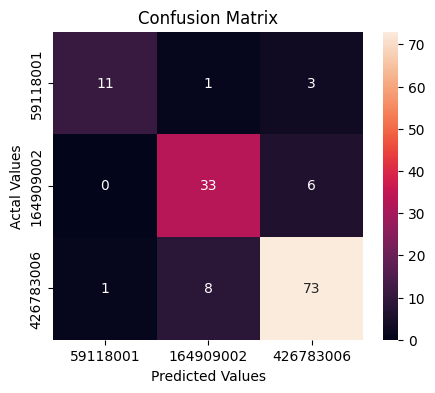

In [142]:
y_pred = clf.predict(X_test)
cm = sk.metrics.confusion_matrix(y_test, y_pred)
print(cm)
cm_df = pd.DataFrame(cm,
                     index =['59118001', '164909002', '426783006'], 
                     columns = ['59118001', '164909002', '426783006'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [10]:
import numpy as np
a = np.array([[1,2], [2,3], [3,4], [4,5], [5,6], [6,7]])
a[:, 1]


array([2, 3, 4, 5, 6, 7])